# Data Science - Laboratorio 2
## Series de Tiempo - Importación, consumo y precios de gasolina
**Integrantes:**
- Diego Leiva
- Pablo Orellana

## Librerias

In [36]:
# Manejo de archivos
import os 

# Manipulación de datos
import pandas as pd
import numpy as np
from datetime import datetime


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import acf, pacf

# Estadística y series temporales
import statsmodels.tsa as tsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# advertencias
# import warnings
# warnings.filterwarnings('ignore')

## Análisis exploratorio

### Comprensión Inicial

#### Cargar los datasets

In [37]:
# Ruta de la carpeta con los archivos
folder_path = 'data'

# Obtener los nombres de los archivos
file_names = [file for file in os.listdir(folder_path) if file.endswith('.csv') and not file.startswith('~')]

# Diccionario para almacenar los dataframes
data_frames = {}

# Iterar sobre los nombres de los archivos
for file in file_names:
    # Construir la ruta del archivo
    file_path = os.path.join(folder_path, file)
    file_name = file.split('.')[0]
    
    # Leer el archivo csv y almacenarlo en un dataframe
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    
    # Guardar el dataframe en el diccionario con el nombre del archivo como clave
    data_frames[file_name] = df

# Mostrar los nombres de los archivos
print(f"Se cargaron un total de {len(data_frames)} archivos\n")
print('Archivos cargados:')
for key in data_frames.keys():
    print(f"\t- {key}")

Se cargaron un total de 3 archivos

Archivos cargados:
	- consumos_combustibles
	- importaciones_combustibles
	- precios_combustibles


#### Visualizar información general de cada dataset

In [38]:
def get_DF_info(df):
    """
    Función que genera un dataframe con información sobre las columnas de un dataframe dado.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        
    Returns:
        None
    """
    # Crear un dataframe con la información de las columnas    
    info = pd.DataFrame({
        'Nombre Columna': df.columns,
        'Tipo de Dato': df.dtypes,
        'Valores Nulos (%)': (df.isnull().sum() * 100 / df.shape[0]).round(2),
        'Valores Únicos': df.nunique(),
        'Valores Duplicados': df.duplicated().sum()
    }).reset_index(drop=True)

    # Mostrar la informacion
    print(f"El dataframe tiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas (variables)\n")
    display(info)

In [39]:
# Mostrar información de cada dataset
for dataset in data_frames.keys():
    print(f"Informacion del dataset: {dataset}")
    get_DF_info(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Informacion del dataset: consumos_combustibles
El dataframe tiene 293 filas (registros) y 23 columnas (variables)



,Nombre Columna,Tipo de Dato,Valores Nulos (%),Valores Únicos,Valores Duplicados
0,Fecha,object,0.00,293,0
1,Aceites lubricantes,float64,0.00,66,0
2,Asfalto,float64,0.00,293,0
3,Bunker,float64,0.00,293,0
4,Ceras,float64,0.34,31,0
5,Combustible turbo jet,float64,0.00,234,0
6,Diesel bajo azufre,float64,0.00,78,0
7,Diesel ultra bajo azufre,float64,0.00,78,0
8,Gas licuado de petróleo,float64,0.00,293,0
9,Gasolina de aviación,float64,0.00,254,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: importaciones_combustibles
El dataframe tiene 281 filas (registros) y 25 columnas (variables)



,Nombre Columna,Tipo de Dato,Valores Nulos (%),Valores Únicos,Valores Duplicados
0,Fecha,object,0.00,281,0
1,Aceites lubricantes,float64,0.00,66,0
2,Asfalto,float64,0.00,270,0
3,Bunker,float64,0.00,281,0
4,Ceras,float64,0.36,61,0
5,Combustible turbo jet,float64,0.00,99,0
6,Diesel bajo azufre,float64,0.00,78,0
7,Diesel ultra bajo azufre,float64,0.00,47,0
8,Gas licuado de petróleo,float64,0.00,281,0
9,Gasolina de aviación,float64,0.00,165,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: precios_combustibles
El dataframe tiene 1312 filas (registros) y 8 columnas (variables)



,Nombre Columna,Tipo de Dato,Valores Nulos (%),Valores Únicos,Valores Duplicados
0,FECHA,object,0.00,1312,0
1,Tipo de Cambio GTQ/USD,float64,0.38,861,0
2,Superior GTQ/GALON,float64,0.00,167,0
3,Regular GTQ/GALON,float64,0.00,168,0
4,Diesel GTQ/GALON,float64,0.00,174,0
5,Bunker GTQ/GALON,float64,0.00,130,0
6,Glp Cilindro 25Lbs. GTQ/CIL 25 LB,float64,0.00,16,0
7,Glp Cilindro 25Lbs GTQ/LB,float64,0.00,16,0



 ---------------------------------------------------------------------------------------------------- 



#### Visualizar Estructura de cada Dataset

In [40]:
for dataset in data_frames.keys():
    print(f"Primeras 5 filas del dataset: {dataset}")
    display(data_frames[dataset].head())
    print("\n",(100*'-'),"\n")

Primeras 5 filas del dataset: consumos_combustibles


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,ene/2000,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.48,1426.0,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1750544.64
1,feb/2000,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.55,1458.0,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1773220.22
2,mar/2000,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.07,1503.0,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1909498.79
3,abr/2000,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.61,1561.0,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1800932.86
4,may/2000,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.15,1642.0,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1941771.90



 ---------------------------------------------------------------------------------------------------- 

Primeras 5 filas del dataset: importaciones_combustibles


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,ene/2001,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.74,820.0,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402.0,0.0,715344.0,2312639.05
1,feb/2001,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.38,3054.0,...,0.0,0.0,0.0,0.0,0.0,489525.80,0.0,0.0,370166.0,1769208.76
2,mar/2001,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.37,677.0,...,0.0,0.0,0.0,0.0,0.0,575559.68,0.0,0.0,360530.0,1945770.26
3,abr/2001,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.64,3399.0,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184.0,0.0,359527.0,1623637.76
4,may/2001,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.86,585.0,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680.0,0.0,723346.0,2262726.64



 ---------------------------------------------------------------------------------------------------- 

Primeras 5 filas del dataset: precios_combustibles


,FECHA,Tipo de Cambio GTQ/USD,Superior GTQ/GALON,Regular GTQ/GALON,Diesel GTQ/GALON,Bunker GTQ/GALON,Glp Cilindro 25Lbs. GTQ/CIL 25 LB,Glp Cilindro 25Lbs GTQ/LB
0,01/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
1,02/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2,03/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
3,04/ene/2021,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
4,05/ene/2021,7.79369,21.91,21.11,17.61,13.45,99.0,3.96



 ---------------------------------------------------------------------------------------------------- 



### Identificación de Variables

**Consumo de Combustibles**
- `Fecha`: mes y año en el que se tomó el registro del consumo de combustibles.
- `Aceites lubricantes`: consumo en unidades de barriles de 42 galones de aceites lubricantes.
- `Asfalto`: consumo en unidades de barriles de 42 galones de asfalto.
- `Bunker`: consumo en unidades de barriles de 42 galones de bunker.
- `Ceras`: consumo en unidades de barriles de 42 galones de ceras.
- `Combustible turbo jet`: consumo en unidades de barriles de 42 galones de combustible turbo jet.
- `Diesel bajo azufre`: consumo en unidades de barriles de 42 galones de diesel bajo azufre.
- `Diesel ultra bajo azufre`: consumo en unidades de barriles de 42 galones de diesel ultra bajo azufre.
- `Gas licuado de petróleo`: consumo en unidades de barriles de 42 galones de gas licuado de petróleo.
- `Gasolina de aviación`: consumo en unidades de barriles de 42 galones de gasolina de aviación.
- `Gasolina regular`: consumo en unidades de barriles de 42 galones de gasolina regular.
- `Gasolina superior`: consumo en unidades de barriles de 42 galones de gasolina superior.
- `Grasas lubricantes`: consumo en unidades de barriles de 42 galones de grasas lubricantes.
- `Kerosina`: consumo en unidades de barriles de 42 galones de kerosina.
- `Mezclas\noleosas`: consumo en unidades de barriles de 42 galones de mezclas oleosas.
- `Naftas`: consumo en unidades de barriles de 42 galones de naftas.
- `PetCoke`: consumo en unidades de barriles de 42 galones de PetCoke.
- `Petróleo crudo`: consumo en unidades de barriles de 42 galones de petróleo crudo.
- `Solventes`: consumo en unidades de barriles de 42 galones de solventes.
- `Butano`: consumo en unidades de barriles de 42 galones de butano.
- `Diesel alto azufre`: consumo en unidades de barriles de 42 galones de diesel alto azufre.
- `Orimulsión`: consumo en unidades de barriles de 42 galones de orimulsión.
- `Total`: consumo total en unidades de barriles de 42 galones de todos los combustibles mencionados.

**Importación de Combustibles**
- `Fecha`: mes y año en el que se tomó el registro de la importación de combustibles.
- `Aceites lubricantes`: importación en unidades de barriles de 42 galones de aceites lubricantes.
- `Asfalto`: importación en unidades de barriles de 42 galones de asfalto.
- `Bunker`: importación en unidades de barriles de 42 galones de bunker.
- `Ceras`: importación en unidades de barriles de 42 galones de ceras.
- `Combustible turbo jet`: importación en unidades de barriles de 42 galones de combustible turbo jet.
- `Diesel bajo azufre`: importación en unidades de barriles de 42 galones de diesel bajo azufre.
- `Diesel ultra bajo azufre`: importación en unidades de barriles de 42 galones de diesel ultra bajo azufre.
- `Gas licuado de petróleo`: importación en unidades de barriles de 42 galones de gas licuado de petróleo.
- `Gasolina de aviación`: importación en unidades de barriles de 42 galones de gasolina de aviación.
- `Gasolina regular`: importación en unidades de barriles de 42 galones de gasolina regular.
- `Gasolina superior`: importación en unidades de barriles de 42 galones de gasolina superior.
- `Grasas lubricantes`: importación en unidades de barriles de 42 galones de grasas lubricantes.
- `Kerosina`: importación en unidades de barriles de 42 galones de kerosina.
- `Mezclas oleosas`: importación en unidades de barriles de 42 galones de mezclas oleosas.
- `Naftas`: importación en unidades de barriles de 42 galones de naftas.
- `PetCoke`: importación en unidades de barriles de 42 galones de PetCoke.
- `Petróleo crudo`: importación en unidades de barriles de 42 galones de petróleo crudo.
- `Solventes`: importación en unidades de barriles de 42 galones de solventes.
- `Butano`: importación en unidades de barriles de 42 galones de butano.
- `Diesel alto azufre`: importación en unidades de barriles de 42 galones de diesel alto azufre.
- `MTBE`: importación en unidades de barriles de 42 galones de Metil terbutil éter (MTBE).
- `Orimulsión`: importación en unidades de barriles de 42 galones de orimulsión.
- `Petróleo reconstituido`: importación en unidades de barriles de 42 galones de petróleo reconstituido.
- `Total importación`: importación total en unidades de barriles de 42 galones de todos los combustibles mencionados.

**Precios de Combustibles**
- `FECHA`: fecha en la que se tomó el registro del precio de combustibles.
- `Tipo de Cambio GTQ/USD`: tipo de cambio del quetzal guatemalteco (GTQ) respecto al dólar estadounidense (USD).
- `Superior GTQ/GALON`: precio en quetzales por galón de gasolina superior.
- `Regular GTQ/GALON`: precio en quetzales por galón de gasolina regular.
- `Diesel GTQ/GALON`: precio en quetzales por galón de diesel.
- `Bunker GTQ/GALON`: precio en quetzales por galón de bunker.
- `Glp Cilindro 25Lbs. GTQ/CIL 25 LB`: precio en quetzales por cilindro de 25 libras de gas licuado de petróleo (GLP).
- `Glp Cilindro 25Lbs GTQ/LB`: precio en quetzales por libra de gas licuado de petróleo (GLP) en cilindros de 25 libras.


In [41]:
def get_categorical_variables(df):
    """
    Función que obtiene las variables categóricas de un dataframe.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
    
    Returns:
        categorical (list): Lista con los nombres de las variables categóricas.
        binary_categorical (list): Lista con los nombres de las variables categóricas binarias.
    """
    # Obtener las variables categóricas
    categorical = df.select_dtypes(include=['object']).columns.tolist()

    print(f"Hay {len(categorical)} variables categoricas en el dataset:")
    for column in categorical:
        print(f"- {column}")

    # Contar las variables categoricas binarias en el dataset de entreno
    binary_categorical = [col for col in categorical if df[col].nunique() == 2]

    print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset:")
    for column in binary_categorical:
        print(f"- {column}")

    return categorical, binary_categorical


In [42]:
def get_numerical_variables(df):
    """
    Función que obtiene las variables numéricas de un dataframe.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
    
    Returns:
        numerical (list): Lista con los nombres de las variables numéricas.
        binary (list): Lista con los nombres de las variables numéricas binarias.
        continuous (list): Lista con los nombres de las variables numéricas continuas.
        discrete (list): Lista con los nombres de las variables numéricas discretas.
    """
    # Encontrar variables numericas en el dataset
    numerical = df.select_dtypes(exclude=['object']).columns.tolist()

    # Contar las variables cuantitativas binarias en el dataset
    binary = [col for col in numerical if df[col].nunique() == 2]

    # Contar las variables cuantitativas continuas en el dataset
    continuous = df.select_dtypes(include=['float']).columns

    # Contar las variables cuantitativas discretas en el dataset
    discrete = [col for col in numerical if col not in continuous and col not in binary]

    print(f"Hay {len(numerical)} variables cuantitativas en el dataset\n")
    print(f"Hay {len(binary)} variables cuantitativas binarias en el dataset:")
    for column in binary:
        print(f"- {column}")

    print(f"\nHay {len(discrete)} variables cuantitativas discretas:")
    for column in discrete:
        print(f"- {column}")

    print(f"\nHay {len(continuous)} variables cuantitativas continuas:")
    for column in continuous:
        print(f"- {column}")

    return numerical, binary, continuous, discrete

##### Variables Categóricas

In [43]:
for dataset in data_frames.keys():
    print(f"Dataset: {dataset}\n")
    categorical, _ = get_categorical_variables(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Dataset: consumos_combustibles

Hay 1 variables categoricas en el dataset:
- Fecha

Hay 0 variables categoricas binarias en el dataset:

 ---------------------------------------------------------------------------------------------------- 

Dataset: importaciones_combustibles

Hay 1 variables categoricas en el dataset:
- Fecha

Hay 0 variables categoricas binarias en el dataset:

 ---------------------------------------------------------------------------------------------------- 

Dataset: precios_combustibles

Hay 1 variables categoricas en el dataset:
- FECHA

Hay 0 variables categoricas binarias en el dataset:

 ---------------------------------------------------------------------------------------------------- 



#### Variables Numéricas

In [44]:
for dataset in data_frames.keys():
    print(f"Dataset: {dataset}")
    numerical, binary, continuous, discrete = get_numerical_variables(data_frames[dataset])
    print("\n", '-'*35, "\n")

Dataset: consumos_combustibles
Hay 22 variables cuantitativas en el dataset

Hay 0 variables cuantitativas binarias en el dataset:

Hay 0 variables cuantitativas discretas:

Hay 22 variables cuantitativas continuas:
- Aceites lubricantes
- Asfalto
- Bunker
- Ceras
- Combustible turbo jet
- Diesel bajo azufre
- Diesel ultra bajo azufre
- Gas licuado de petróleo
- Gasolina de aviación
- Gasolina regular
- Gasolina superior
- Grasas lubricantes
- Kerosina
- Mezclas
oleosas
- Naftas
- PetCoke
- Petróleo crudo
- Solventes
- Butano
- Diesel alto azufre
- Orimulsión
- Total

 ----------------------------------- 

Dataset: importaciones_combustibles
Hay 24 variables cuantitativas en el dataset

Hay 0 variables cuantitativas binarias en el dataset:

Hay 0 variables cuantitativas discretas:

Hay 24 variables cuantitativas continuas:
- Aceites lubricantes
- Asfalto 
- Bunker
- Ceras
- Combustible turbo jet
- Diesel bajo azufre
- Diesel ultra bajo azufre
- Gas licuado de petróleo
- Gasolina de avi

### Preprocesamiento y Limpieza

#### Verificación y Manejo de valores nulos o faltantes

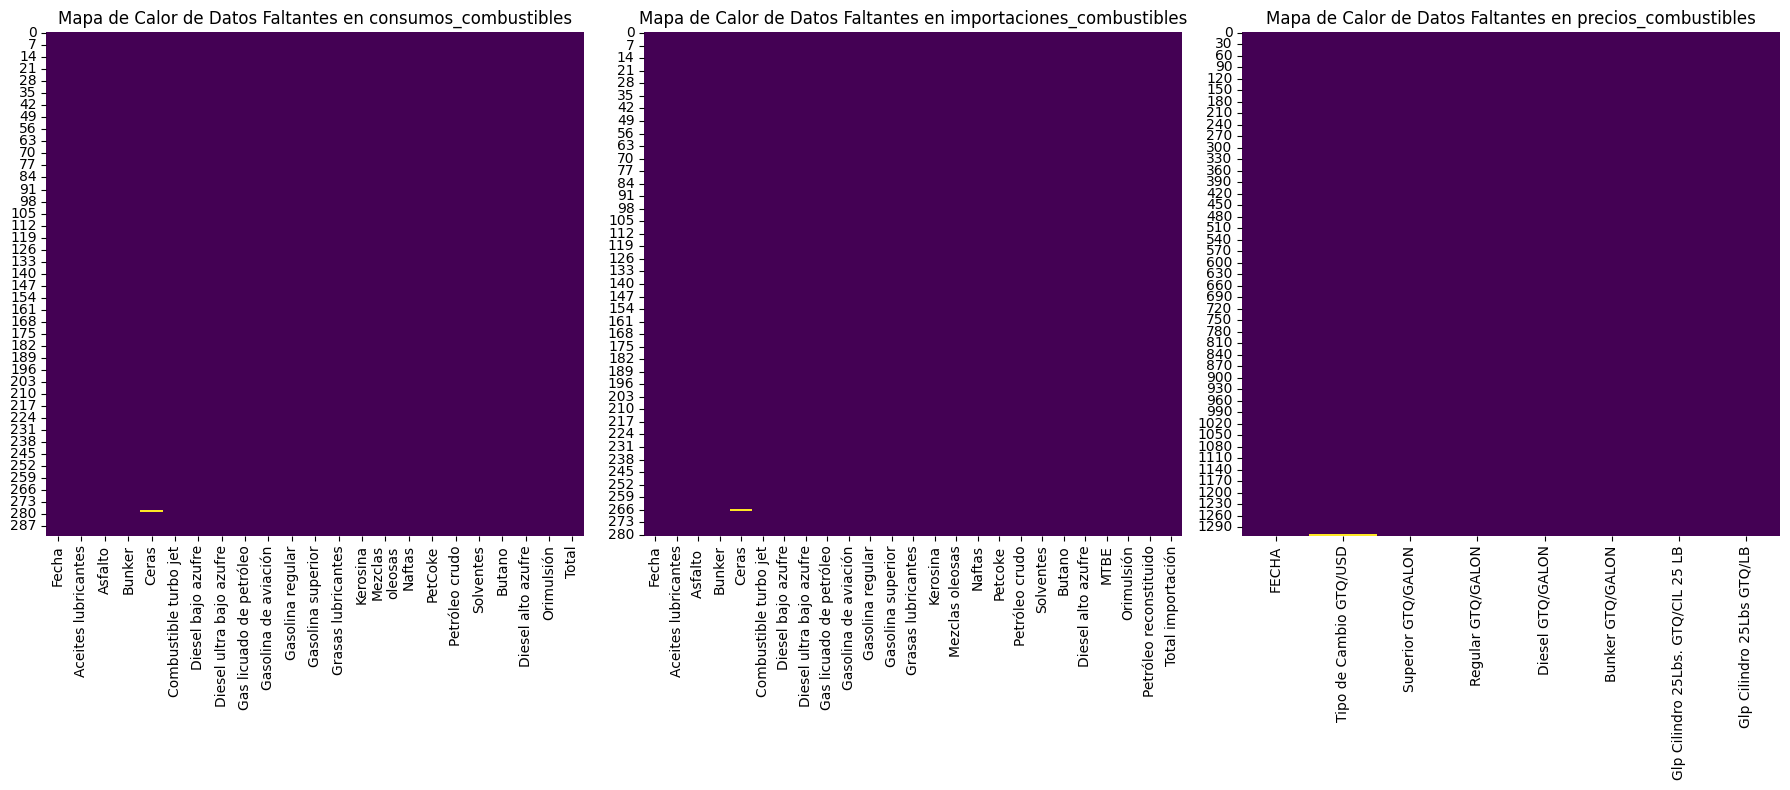

In [45]:
# Crear los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Iterar sobre los dataframes en el diccionario
for ax, (key, df) in zip(axes, data_frames.items()):
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', ax=ax)
    ax.set_title(f'Mapa de Calor de Datos Faltantes en {key}')

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()

Los tres dataframes muestran que los datos faltantes son mínimos y están contenidos en una sola variable, corroborando nuestra exploración inicial que indicaba que ninguno de los dataframes tenía más del 1% de datos faltantes. Esta situación sugiere que la calidad de los datos es bastante buena y que los datos faltantes no deberían tener un impacto significativo en cualquier análisis posterior.
De todas formas se realizara un análisis de impacto para ver si eliminar esos registros es factible o mejor se realiza algun tipo de imputación de datos.

In [46]:
# Diccionario para almacenar los resultados
cleaned_data_info = {}

# Iterar sobre cada dataframe en el diccionario
for key, df in data_frames.items():
    # Crear una copia del dataframe
    df_copy = df.copy()
    
    # Eliminar filas con cualquier valor nulo
    df_clean = df_copy.dropna()
    
    # Verificar cuántos registros quedan después de eliminar los nulos
    remaining_records = df_clean.shape[0]
    remaining_records_percentage = (remaining_records / df.shape[0]) * 100
    
    # Guardar la información en el diccionario
    cleaned_data_info[key] = {
        'remaining_records': remaining_records,
        'remaining_records_percentage': remaining_records_percentage
    }

# Imprimir los resultados
for key, info in cleaned_data_info.items():
    print(f"Si se eliminan todas las observaciones con valores nulos en '{key}'")
    print (f"Quedarian {info['remaining_records']} registros, de los {data_frames[key].shape[0]} registros iniciales")
    print(f"Es decir {info['remaining_records_percentage']:.2f}% de la data original")
    print('-'*100)


Si se eliminan todas las observaciones con valores nulos en 'consumos_combustibles'
Quedarian 292 registros, de los 293 registros iniciales
Es decir 99.66% de la data original
----------------------------------------------------------------------------------------------------
Si se eliminan todas las observaciones con valores nulos en 'importaciones_combustibles'
Quedarian 280 registros, de los 281 registros iniciales
Es decir 99.64% de la data original
----------------------------------------------------------------------------------------------------
Si se eliminan todas las observaciones con valores nulos en 'precios_combustibles'
Quedarian 1307 registros, de los 1312 registros iniciales
Es decir 99.62% de la data original
----------------------------------------------------------------------------------------------------


En los tres dataframes, los datos faltantes representan menos del 0.5% del total de registros. Por lo tanto, la calidad de los datos es bastante buena y la eliminación de las observaciones con valores nulos no afectará significativamente el análisis posterior. Se puede proceder con la limpieza de datos eliminando las filas con valores nulos sin preocuparse por una pérdida significativa de información.

In [47]:
# cargar cada dataset como su propio dataframe
consumos = data_frames['consumos_combustibles']
importaciones = data_frames['importaciones_combustibles']
precios = data_frames['precios_combustibles']

# Eliminar los registros con valores nulos
consumos.dropna(inplace=True)
importaciones.dropna(inplace=True)
precios.dropna(inplace=True)

# Comprobar si hay valores nulos
print("Valores nulos en el dataset de consumo de combustibles:", consumos.isnull().sum().sum())
print("Valores nulos en el dataset de importación de combustibles:", importaciones.isnull().sum().sum())
print("Valores nulos en el dataset de precios de combustibles:", precios.isnull().sum().sum())

Valores nulos en el dataset de consumo de combustibles: 0
Valores nulos en el dataset de importación de combustibles: 0
Valores nulos en el dataset de precios de combustibles: 0


#### Manejo de Variables Cualitativas Temporales

Dado que los 3 datasets contienen una unica variable culitativa la cual es fecha, esta debe de transformarse a tipo datetime para poder ser manipulada como tal, actualmente en los 3 datasets esta variable `FECHA` se encuentra como string. Esta columna posteriormente se colocara como el indice de cada dataset para que se pueda tener una serie temporal.

In [48]:
# Diccionario de meses en español a inglés
month_mapping = {
    'ene': 'Jan',
    'feb': 'Feb',
    'mar': 'Mar',
    'abr': 'Apr',
    'may': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'ago': 'Aug',
    'sep': 'Sep',
    'oct': 'Oct',
    'nov': 'Nov',
    'dic': 'Dec'
}

# Función para reemplazar los nombres de los meses
def replace_months(date_str):
    for esp, eng in month_mapping.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Por fines practicos, se renombra la columna  'FECHA' a 'Fecha' en el dataset de precios de combustibles
precios.rename(columns={'FECHA': 'Fecha'}, inplace=True)

# Aplicar la función a las columnas de fecha de los dataframes
consumos['Fecha'] = consumos['Fecha'].apply(replace_months)
importaciones['Fecha'] = importaciones['Fecha'].apply(replace_months)
precios['Fecha'] = precios['Fecha'].apply(replace_months)

# Convertir las columnas de fecha a datetime
consumos['Fecha'] = pd.to_datetime(consumos['Fecha'], format='%b/%Y')
importaciones['Fecha'] = pd.to_datetime(importaciones['Fecha'], format='%b/%Y')
precios['Fecha'] = pd.to_datetime(precios['Fecha'], format='%d/%b/%Y')

# Establecer la columna 'Fecha' como índice en los tres dataframes
consumos.set_index('Fecha', inplace=True)
importaciones.set_index('Fecha', inplace=True)
precios.set_index('Fecha', inplace=True)

# Converir los indices a datetime
consumos.index = pd.to_datetime(consumos.index)
importaciones.index = pd.to_datetime(importaciones.index)
precios.index = pd.to_datetime(precios.index)

# Verificar los resultados
print("Consumo de combustibles:")
display(data_frames['consumos_combustibles'].head())
print("Importación de combustibles:")
display(data_frames['importaciones_combustibles'].head())
print("Precios de combustibles:")
display(data_frames['precios_combustibles'].head())


Consumo de combustibles:


,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,Gasolina regular,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
Fecha,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.48,1426.0,202645.20,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1750544.64
2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.55,1458.0,205530.96,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1773220.22
2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.07,1503.0,229499.56,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1909498.79
2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.61,1561.0,210680.40,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1800932.86
2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.15,1642.0,208164.34,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1941771.90


Importación de combustibles:


,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,Gasolina regular,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
Fecha,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.74,820.0,177776.50,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402.0,0.0,715344.0,2312639.05
2001-02-01,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.38,3054.0,123115.99,...,0.0,0.0,0.0,0.0,0.0,489525.80,0.0,0.0,370166.0,1769208.76
2001-03-01,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.37,677.0,161726.42,...,0.0,0.0,0.0,0.0,0.0,575559.68,0.0,0.0,360530.0,1945770.26
2001-04-01,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.64,3399.0,127338.74,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184.0,0.0,359527.0,1623637.76
2001-05-01,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.86,585.0,168730.19,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680.0,0.0,723346.0,2262726.64


Precios de combustibles:


,Tipo de Cambio GTQ/USD,Superior GTQ/GALON,Regular GTQ/GALON,Diesel GTQ/GALON,Bunker GTQ/GALON,Glp Cilindro 25Lbs. GTQ/CIL 25 LB,Glp Cilindro 25Lbs GTQ/LB
Fecha,,,,,,,
2021-01-01,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2021-01-02,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2021-01-03,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2021-01-04,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
2021-01-05,7.79369,21.91,21.11,17.61,13.45,99.0,3.96


#### Selección de Variables

En este estudio y análisis de series de tiempo, solo se tomarán en cuenta los datos de importación, consumo y precios de los siguientes tipos de combustibles:
- `Gasolina Súper`
- `Gasolina Regular`
- `Diesel`
- `Gas Propano`

**Detalles del Análisis**

Se utilizarán los datos de importación de los siguientes combustibles:
- Gasolina Regular
- Gasolina Súper
- Diesel con alto contenido de azufre hasta el 2018 y luego diesel con bajo contenido de azufre desde el año 2018 en adelante
- Gas Licuado de Petróleo (Gas Propano)

Se utilizarán los datos de consumo de los siguientes combustibles:
- Gasolina Regular
- Gasolina Súper
- Diesel con alto contenido de azufre hasta el 2018 y luego diesel con bajo contenido de azufre desde el año 2018 en adelante
- Gas Licuado de Petróleo (Gas Propano)

Se utilizarán los datos de precios diarios de los siguientes combustibles:
- Gasolina Regular (en Quetzales por galón)
- Gasolina Súper (en Quetzales por galón)
- Diesel (en Quetzales por galón)
- Gas Propano (en Quetzales por cilindro de 25 libras)

**Renombrar variables**

In [49]:
def combine_diesel(df, high_sulfur_col, low_sulfur_col, combined_col):
    """
    Función que combina las columnas de Diesel de alto y bajo azufre en una sola columna.
    Toma los valores de Diesel de alto azufre hasta 2017 y los de Diesel de bajo azufre a partir de 2018.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        high_sulfur_col (str): El nombre de la columna de Diesel de alto azufre.
        low_sulfur_col (str): El nombre de la columna de Diesel de bajo azufre.
        combined_col (str): El nombre de la nueva columna combinada.
    
    Returns:
        data (pandas.DataFrame): El dataframe de entrada con la nueva columna combinada.
    """
    # Crear una copia del dataframe
    data = df.copy()

    # Crear una nueva columna con los valores de Diesel de alto azufre
    data.loc[data.index < '2018-01-01', combined_col] = data[high_sulfur_col]
    data.loc[data.index >= '2018-01-01', combined_col] = data[low_sulfur_col]

    # Eliminar las columnas originales
    data.drop(columns=[high_sulfur_col, low_sulfur_col], inplace=True)

    return data

In [50]:
# Seleccionar las columnas de interés
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre', 'Diesel bajo azufre', 'Gas licuado de petróleo']

# Filtrar y combinar columnas en 'consumo_combustibles'
consumos = consumos[cols].copy()
consumos = combine_diesel(consumos, 'Diesel alto azufre', 'Diesel bajo azufre', 'Diesel')

# Filtrar y combinar columnas en 'importacion_combustibles'
importaciones = importaciones[cols].copy()
importaciones = combine_diesel(importaciones, 'Diesel alto azufre', 'Diesel bajo azufre', 'Diesel')

# Filtrar columnas en 'precios_combustibles'
precios_cols = ['Superior GTQ/GALON', 'Regular GTQ/GALON', 'Diesel GTQ/GALON', 'Glp Cilindro 25Lbs GTQ/LB']
precios = precios[precios_cols].copy()

precios.rename(columns={
    'Superior GTQ/GALON': 'Gasolina Superior',
    'Regular GTQ/GALON': 'Gasolina Regular',
    'Diesel GTQ/GALON': 'Diesel',
    'Glp Cilindro 25Lbs GTQ/LB': 'Gas Propano'
}, inplace=True)

# Renombrar columnas en 'consumo_combustibles'
consumos.rename(columns={
    'Gasolina regular': 'Gasolina Regular',
    'Gasolina superior': 'Gasolina Superior',
    'Gas licuado de petróleo': 'Gas Propano'
}, inplace=True)

# Renombrar columnas en 'importacion_combustibles'
importaciones.rename(columns={
    'Gasolina regular': 'Gasolina Regular',
    'Gasolina superior': 'Gasolina Superior',
    'Gas licuado de petróleo': 'Gas Propano'
}, inplace=True)

# Verificar los resultados
print("Consumo de combustibles:")
display(consumos.head())
print("-" * 50)
print("Importación de combustibles:")
display(importaciones.head())
print("-" * 50)
print("Precios de combustibles:")
display(precios.head())
print("-" * 50)

Consumo de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
Fecha,,,,
2000-01-01,202645.20,308156.82,194410.48,634667.06
2000-02-01,205530.96,307766.31,174710.55,642380.66
2000-03-01,229499.56,331910.29,189234.07,699807.25
2000-04-01,210680.40,315648.08,174330.61,586803.98
2000-05-01,208164.34,319667.97,191745.15,656948.20


--------------------------------------------------
Importación de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
Fecha,,,,
2001-01-01,177776.50,373963.96,194065.74,566101.99
2001-02-01,123115.99,243091.07,170703.38,489525.80
2001-03-01,161726.42,312084.38,161837.37,575559.68
2001-04-01,127338.74,285054.89,163048.64,437745.42
2001-05-01,168730.19,300913.67,171518.86,552609.13


--------------------------------------------------
Precios de combustibles:


,Gasolina Superior,Gasolina Regular,Diesel,Gas Propano
Fecha,,,,
2021-01-01,21.91,21.11,17.61,3.96
2021-01-02,21.91,21.11,17.61,3.96
2021-01-03,21.91,21.11,17.61,3.96
2021-01-04,21.91,21.11,17.61,3.96
2021-01-05,21.91,21.11,17.61,3.96


--------------------------------------------------


### Análisis Estadístico

#### Estadísticas Descriptivas

In [51]:
print("Consumo de combustibles:")
display(consumos.describe())
print("-" * 50)
print("Importación de combustibles:")
display(importaciones.describe())
print("-" * 50)
print("Precios de combustibles:")
display(precios.describe())

Consumo de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
count,292.000000,292.000000,292.000000,2.920000e+02
mean,384817.143014,463903.413562,311403.731815,8.677512e+05
std,207931.539192,107945.695685,108292.123811,2.161464e+05
min,160741.900000,300242.780000,167818.140000,5.076627e+05
25%,214358.977500,382027.120000,225840.585000,6.994906e+05
50%,284115.545000,419620.260000,261956.275000,8.058445e+05
75%,524018.277500,565485.195000,391028.107500,1.031191e+06
max,894533.140000,768102.830000,574148.000000,1.428143e+06


--------------------------------------------------
Importación de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
count,280.000000,2.800000e+02,2.800000e+02,2.800000e+02
mean,399997.911536,4.848434e+05,4.080441e+05,8.799452e+05
std,233337.213868,1.540124e+05,1.968704e+05,2.849877e+05
min,81015.300000,1.702925e+05,1.005615e+05,2.297647e+05
25%,204839.192500,3.665792e+05,2.241630e+05,6.861090e+05
50%,319948.200000,4.689286e+05,4.095000e+05,8.428678e+05
75%,548103.295000,5.932063e+05,5.625798e+05,1.088463e+06
max,987872.050000,1.227174e+06,1.077123e+06,1.595699e+06


--------------------------------------------------
Precios de combustibles:


,Gasolina Superior,Gasolina Regular,Diesel,Gas Propano
count,1307.000000,1307.000000,1307.000000,1307.000000
mean,32.652425,31.402188,28.987253,4.929082
std,4.113918,3.833986,5.309641,0.359317
min,21.910000,21.110000,17.610000,3.960000
25%,29.280000,28.490000,25.410000,4.600000
50%,33.080000,31.780000,29.370000,4.880000
75%,35.640000,34.160000,32.650000,5.280000
max,43.240000,40.500000,41.270000,5.880000


##### Resumen Estadístico

**Consumo de Combustibles:**
- Gasolina Regular: El consumo promedio es de aproximadamente 384,817 barriles, con una desviación estándar de 207,931 barriles. Los valores van desde 160,742 hasta 894,533 barriles, con la mediana en 284,116 barriles.
- Gasolina Superior: El promedio es de 463,903 barriles, con una desviación estándar de 107,946 barriles. Los valores van desde 300,243 hasta 768,103 barriles, con la mediana en 419,620 barriles.
- Gas Propano: El consumo promedio es de 311,404 barriles, con una desviación estándar de 108,292 barriles. Los valores van desde 167,818 hasta 574,148 barriles, con la mediana en 261,956 barriles.
- Diesel: El promedio de consumo es de 867,751 barriles, con una desviación estándar de 216,146 barriles. Los valores van desde 507,663 hasta 1,428,143 barriles, con la mediana en 805,845 barriles.

**Importación de Combustibles:**
- Gasolina Regular: El promedio de importación es de 399,998 barriles, con una desviación estándar de 233,337 barriles. Los valores van desde 81,015 hasta 987,872 barriles, con la mediana en 319,948 barriles.
- Gasolina Superior: El promedio es de 484,843 barriles, con una desviación estándar de 154,012 barriles. Los valores van desde 170,293 hasta 1,227,174 barriles, con la mediana en 468,929 barriles.
- Gas Propano: El promedio de importación es de 408,044 barriles, con una desviación estándar de 196,870 barriles. Los valores van desde 100,562 hasta 1,077,123 barriles, con la mediana en 409,500 barriles.
- Diesel: El promedio es de 879,945 barriles, con una desviación estándar de 284,988 barriles. Los valores van desde 229,765 hasta 1,595,699 barriles, con la mediana en 842,868 barriles.

**Precios de Combustibles:**
- Gasolina Superior: El precio promedio es de 32.65 Quetzales por galón, con una desviación estándar de 4.11. Los precios van desde 21.91 hasta 43.24 Quetzales por galón, con la mediana en 33.08 Quetzales.
- Gasolina Regular: El promedio es de 31.40 Quetzales por galón, con una desviación estándar de 3.83. Los precios van desde 21.11 hasta 40.50 Quetzales por galón, con la mediana en 31.78 Quetzales.
- Diesel: El precio promedio es de 28.99 Quetzales por galón, con una desviación estándar de 5.31. Los precios van desde 17.61 hasta 41.27 Quetzales por galón, con la mediana en 29.37 Quetzales.
- Gas Propano: El precio promedio es de 4.93 Quetzales por cilindro de 25 lbs, con una desviación estándar de 0.36. Los precios van desde 3.96 hasta 5.88 Quetzales, con la mediana en 4.88 Quetzales.

#### Distribuciones

##### Consumo

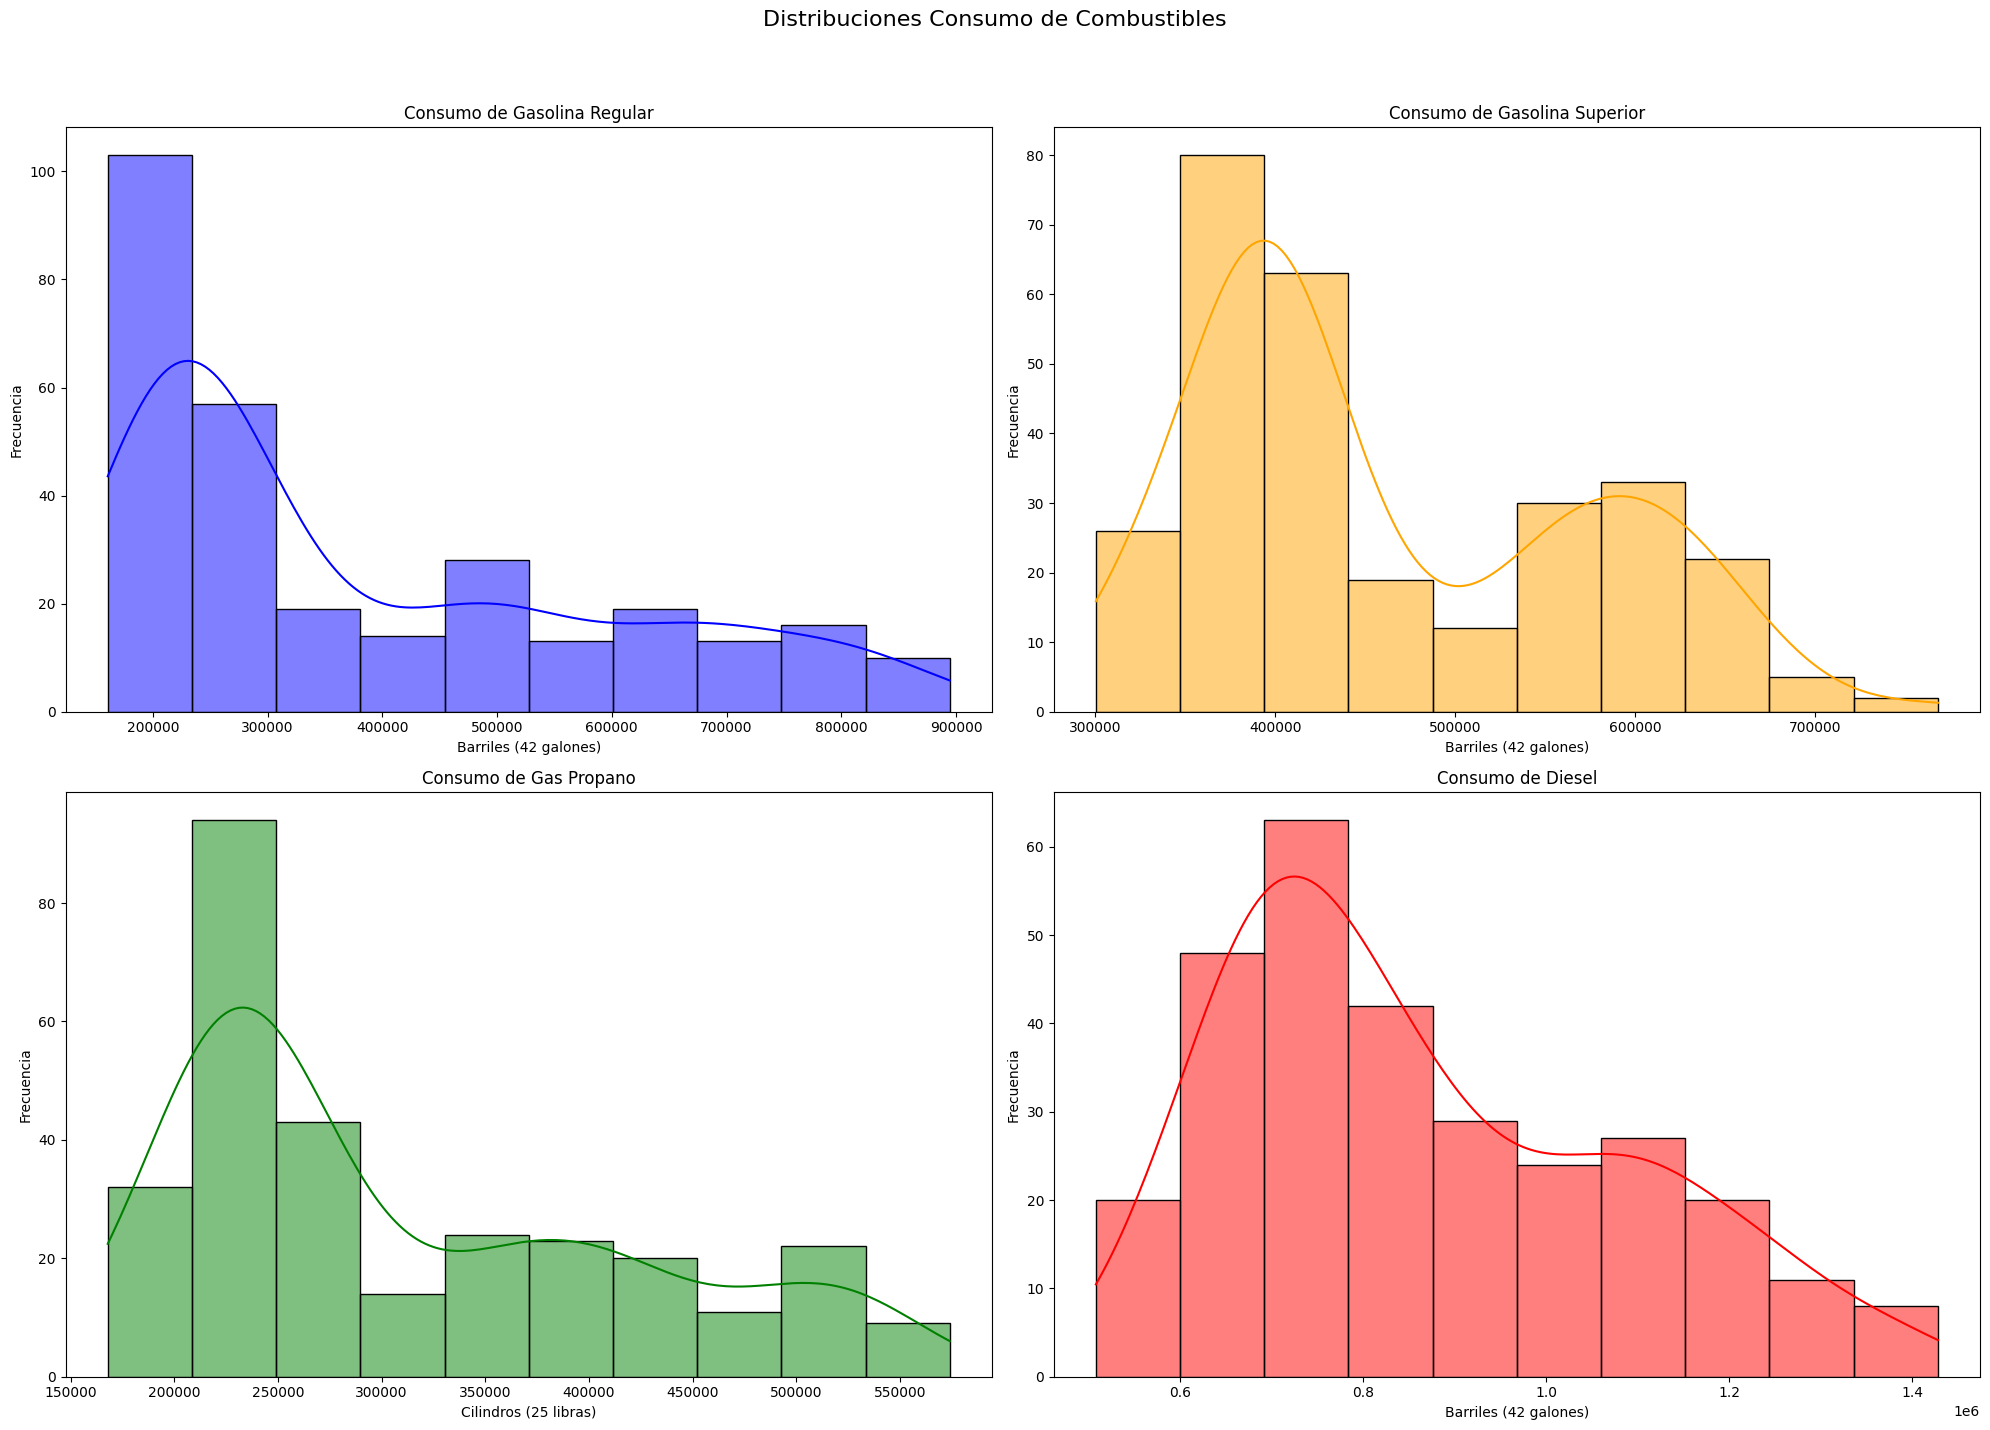

In [52]:
# Configuración de subplots para Consumo de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(consumos['Gasolina Regular'], kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Consumo de Gasolina Regular')
axs[0,0].set_xlabel('Barriles (42 galones)')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(consumos['Gasolina Superior'], kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Consumo de Gasolina Superior')
axs[0,1].set_xlabel('Barriles (42 galones)')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(consumos['Gas Propano'], kde=True, ax=axs[1,0], color='green')
axs[1,0].set_title('Consumo de Gas Propano')
axs[1,0].set_xlabel('Cilindros (25 libras)')
axs[1,0].set_ylabel('Frecuencia')

sns.histplot(consumos['Diesel'], kde=True, ax=axs[1,1], color='red')
axs[1,1].set_title('Consumo de Diesel')
axs[1,1].set_xlabel('Barriles (42 galones)')
axs[1,1].set_ylabel('Frecuencia')

fig.suptitle("Distribuciones Consumo de Combustibles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Observaciones**
- `Gasolina Regular`: Muestra una distribución sesgada hacia la derecha, con el pico más alto en torno a 200,000 barriles. El consumo disminuye gradualmente a medida que aumenta el volumen.
- `Gasolina Superior`: Tiene una distribución multimodal, con picos en aproximadamente 400,000 y 600,000 barriles. Hay menos consumo en los extremos.
- `Gas Propano`: Presenta una distribución asimétrica con el pico más alto alrededor de 200,000-250,000 cilindros. El consumo disminuye rápidamente después de este pico.
- `Diesel`: Muestra una distribución más simétrica centrada alrededor de 0.8 millones de barriles, con una caída gradual en ambos lados.
  

##### Importación

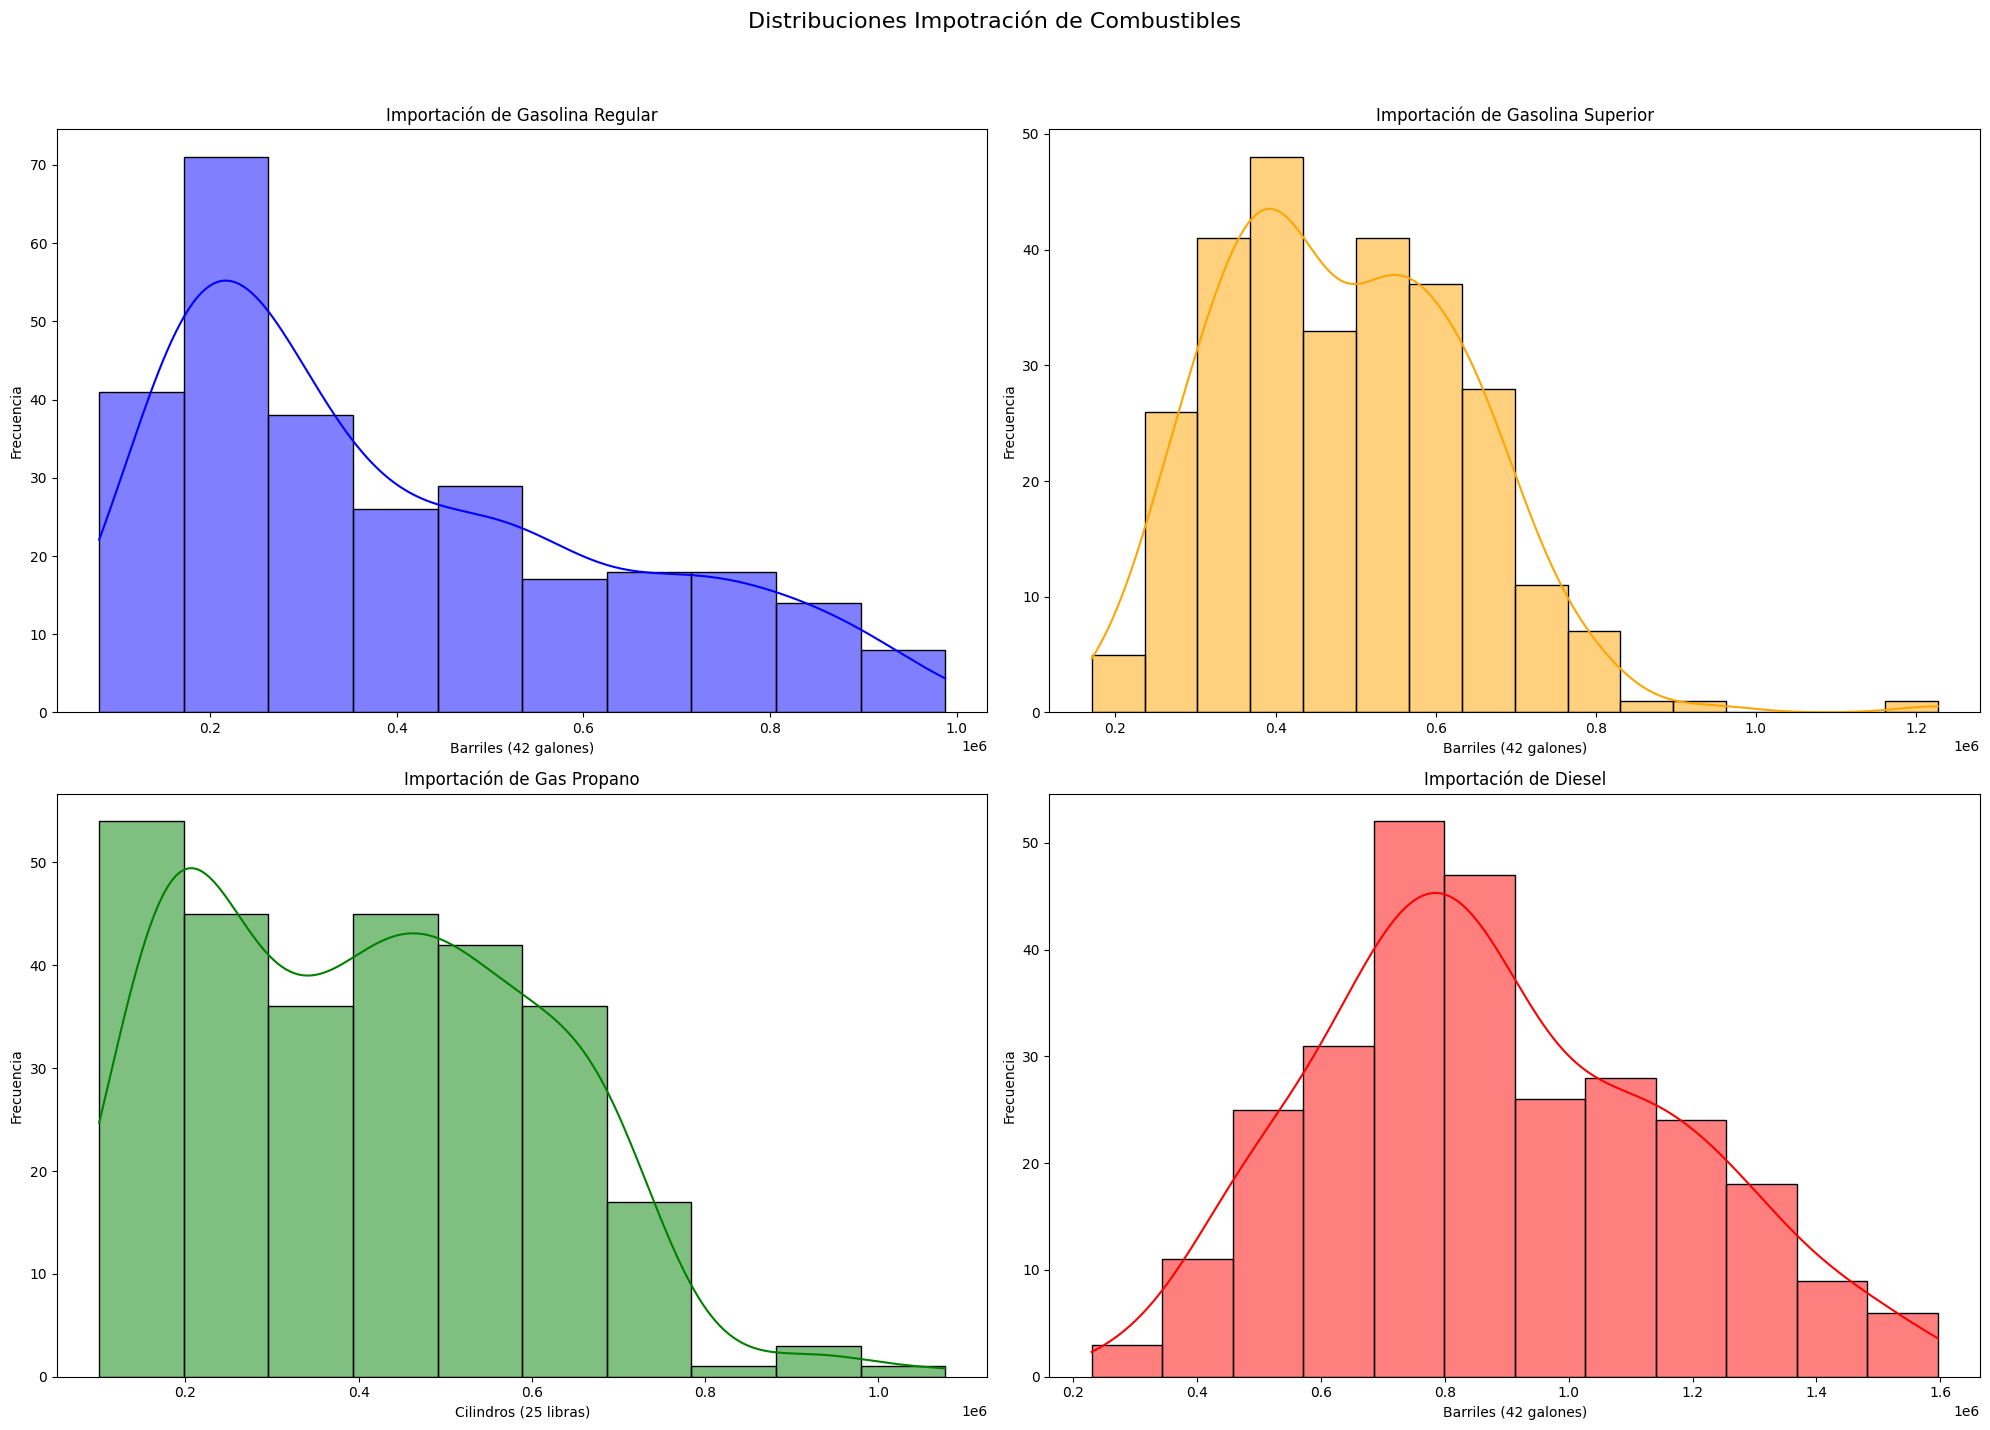

In [53]:
# Configuración de subplots para Importación de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(importaciones['Gasolina Regular'], kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Importación de Gasolina Regular')
axs[0,0].set_xlabel('Barriles (42 galones)')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(importaciones['Gasolina Superior'], kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Importación de Gasolina Superior')
axs[0,1].set_xlabel('Barriles (42 galones)')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(importaciones['Gas Propano'], kde=True, ax=axs[1,0], color='green')
axs[1,0].set_title('Importación de Gas Propano')
axs[1,0].set_xlabel('Cilindros (25 libras)')
axs[1,0].set_ylabel('Frecuencia')

sns.histplot(importaciones['Diesel'], kde=True, ax=axs[1,1], color='red')
axs[1,1].set_title('Importación de Diesel')
axs[1,1].set_xlabel('Barriles (42 galones)')
axs[1,1].set_ylabel('Frecuencia')

fig.suptitle("Distribuciones Impotración de Combustibles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observaciones**
- `Gasolina Regular`: Tiene una distribución sesgada a la derecha, con el pico más alto en torno a 0.2 millones de barriles.
- `Gasolina Superior`: Muestra una distribución más simétrica, con el pico alrededor de 0.4 millones de barriles.
- `Gas Propano`: Presenta una distribución bastante uniforme en el rango de 0.2 a 0.6 millones de cilindros, con una caída después.
- `Diesel`: Tiene una distribución aproximadamente normal centrada alrededor de 0.7-0.8 millones de barriles.

##### Precios Diarios

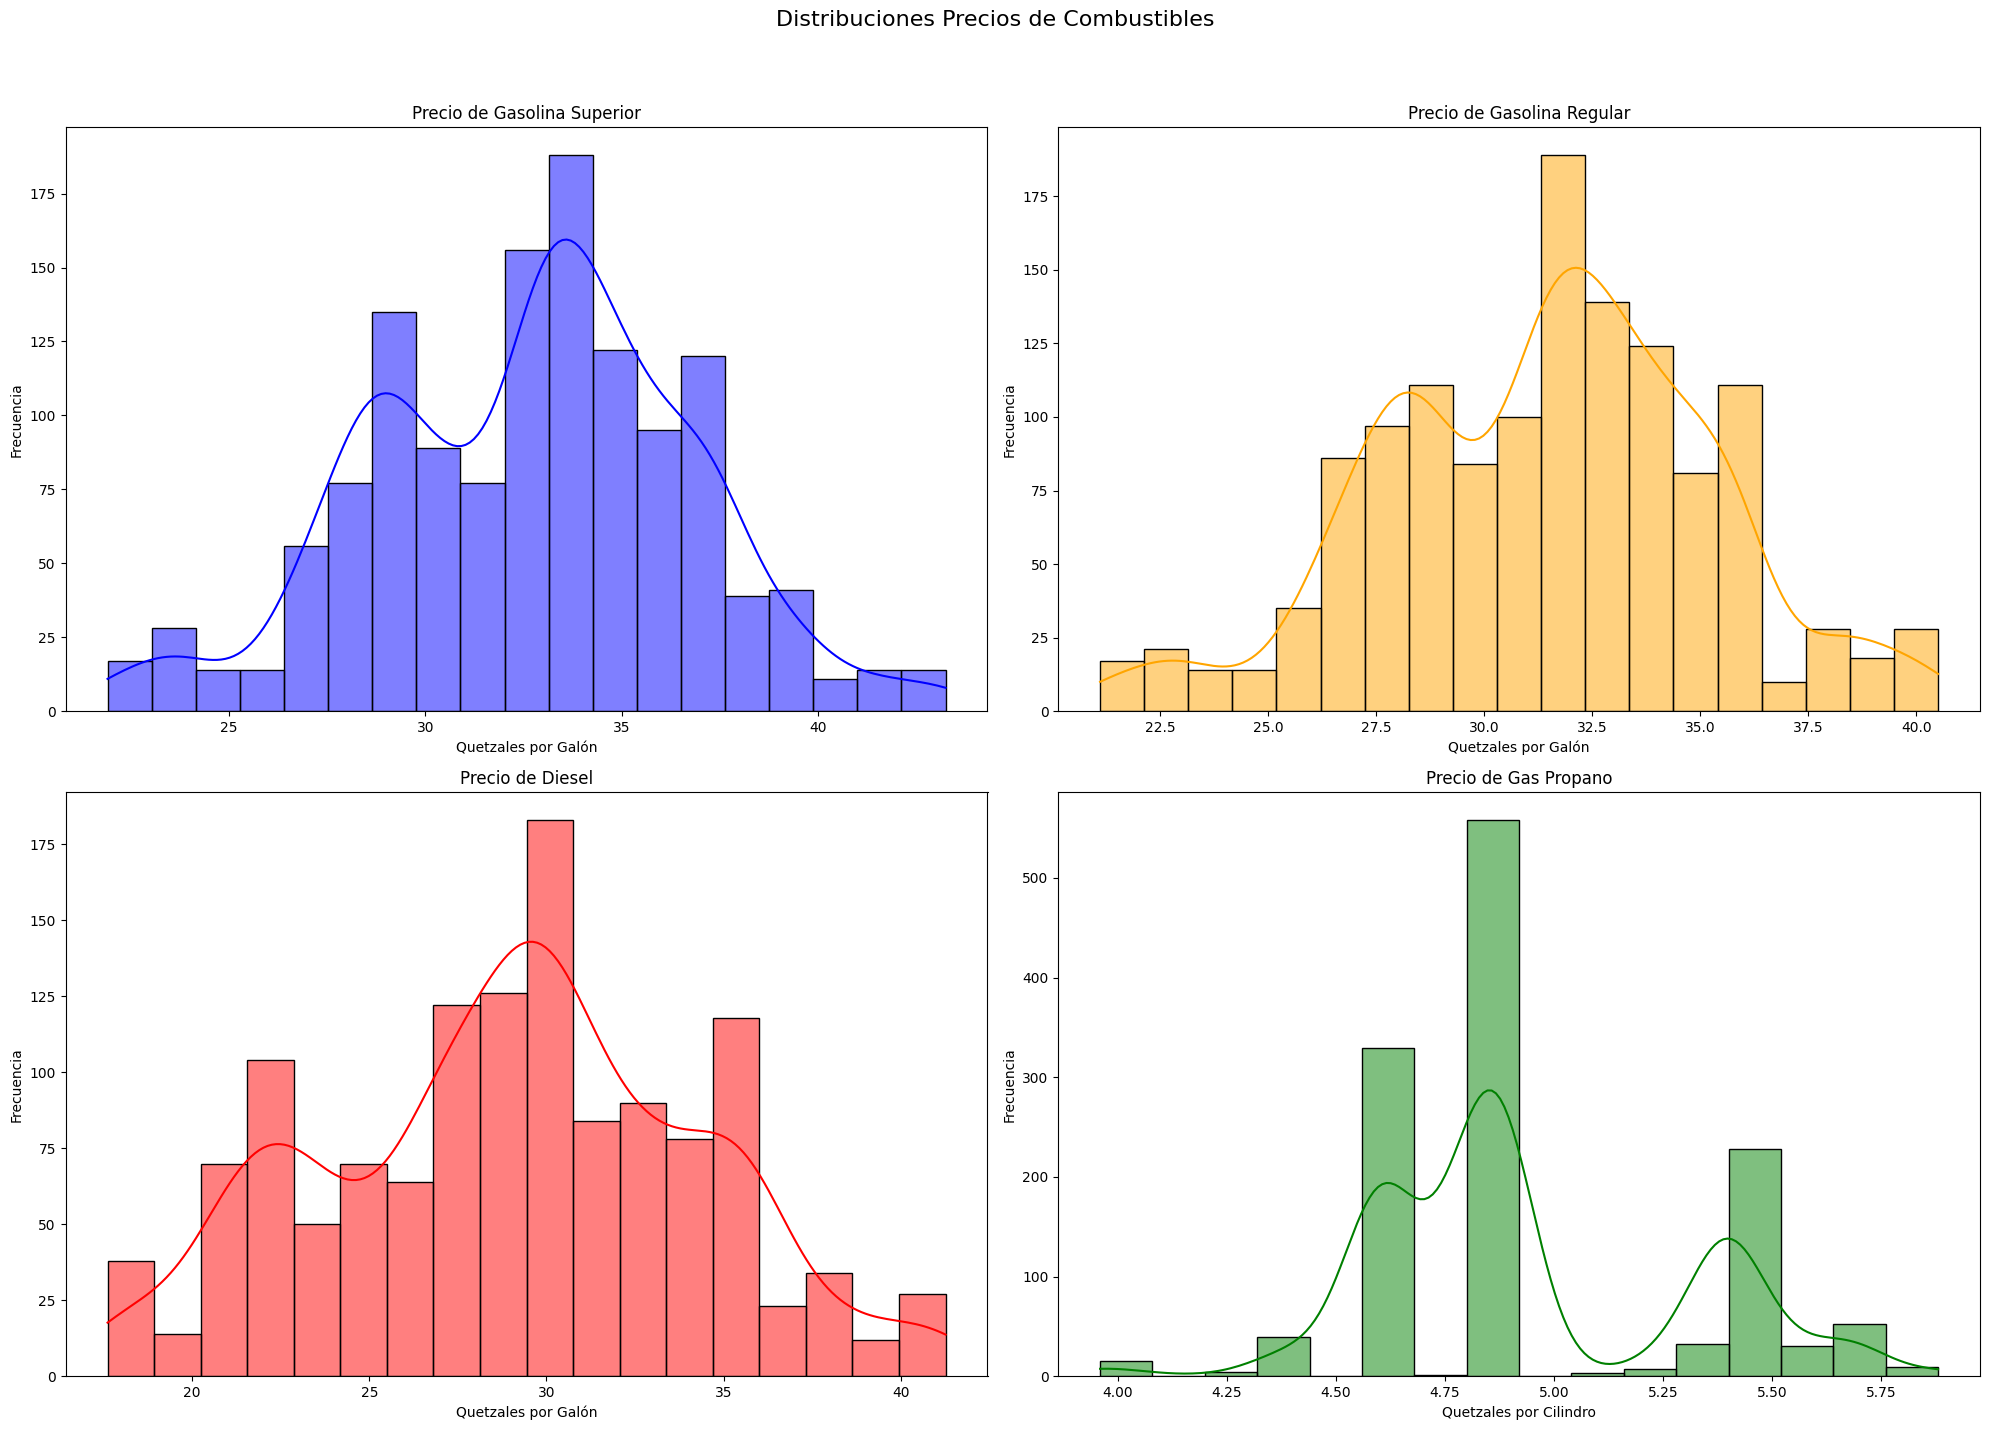

In [54]:
# Configuración de subplots para Precios de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(precios['Gasolina Superior'], kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Precio de Gasolina Superior')
axs[0,0].set_xlabel('Quetzales por Galón')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(precios['Gasolina Regular'], kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Precio de Gasolina Regular')
axs[0,1].set_xlabel('Quetzales por Galón')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(precios['Diesel'], kde=True, ax=axs[1,0], color='red')
axs[1,0].set_title('Precio de Diesel')
axs[1,0].set_xlabel('Quetzales por Galón')
axs[1,0].set_ylabel('Frecuencia')

sns.histplot(precios['Gas Propano'], kde=True, ax=axs[1,1], color='green')
axs[1,1].set_title('Precio de Gas Propano')
axs[1,1].set_xlabel('Quetzales por Cilindro')
axs[1,1].set_ylabel('Frecuencia')

fig.suptitle("Distribuciones Precios de Combustibles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observaciones**
- `Gasolina Superior`: Muestra una distribución multimodal con picos alrededor de 30 y 35 quetzales por galón.
- `Gasolina Regular`: Tiene una distribución asimétrica con el pico más alto cerca de 32 quetzales por galón.
- `Diesel`: Presenta una distribución multimodal con el pico más alto alrededor de 30 quetzales por galón y otro mas leve alrededor de los 20-25 quetzales por galón.
- `Gas Propano`: Muestra una distribución muy sesgada con un pico pronunciado cerca de 4.75-5.00 quetzales por cilindro, otro pico menos pronunciado cerca de 4.50-4.75 quetzales por galon y un pico mas alrededor de 5.50 quetzales por galón.

##### Resumen

- La mayoría de las distribuciones muestran asimetría, particularmente sesgos hacia la derecha. Esto es común en datos económicos y de consumo.
- Varias distribuciones, especialmente en los precios, muestran múltiples picos. Esto puede indicar diferentes regímenes de precios o períodos distintos en los datos.
- Hay considerable variabilidad en todas las métricas, lo cual es típico en series de tiempo económicas.
- Algunas distribuciones muestran colas largas, lo que puede indicar la presencia de valores atípicos.

#### Valores Atípicos

##### Consumo

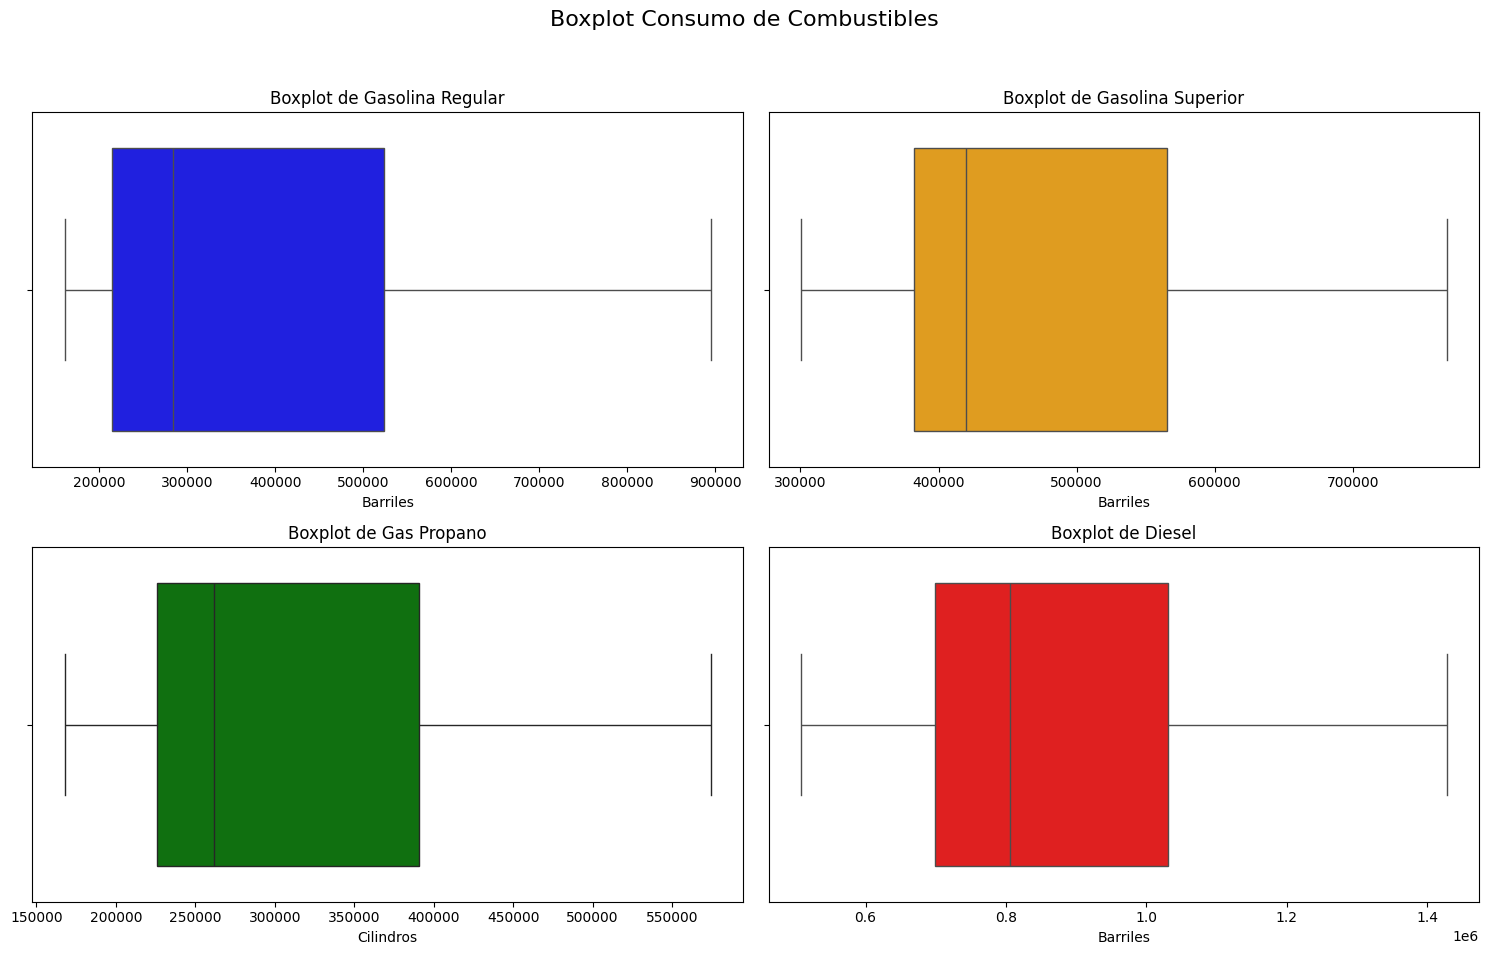

In [55]:
# Configuración de subplots para Consumo de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Configuración para Gasolina Regular
sns.boxplot(x=consumos['Gasolina Regular'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Boxplot de Gasolina Regular')
axs[0, 0].set_xlabel('Barriles')

# Configuración para Gasolina Superior
sns.boxplot(x=consumos['Gasolina Superior'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Boxplot de Gasolina Superior')
axs[0, 1].set_xlabel('Barriles')

# Configuración para Gas Propano
sns.boxplot(x=consumos['Gas Propano'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Boxplot de Gas Propano')
axs[1, 0].set_xlabel('Cilindros')

# Configuración para Diesel
sns.boxplot(x=consumos['Diesel'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Boxplot de Diesel')
axs[1, 1].set_xlabel('Barriles')

# Ajustar el layout
fig.suptitle("Boxplot Consumo de Combustibles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observaciones**
- Todas las distribuciones muestran cierta asimetría, con colas más largas hacia la derecha.
- Parece que hay presencia de outliers, especialmente en gasolina regular y superior.
- La variabilidad es considerable en todos los combustibles.

##### Importación

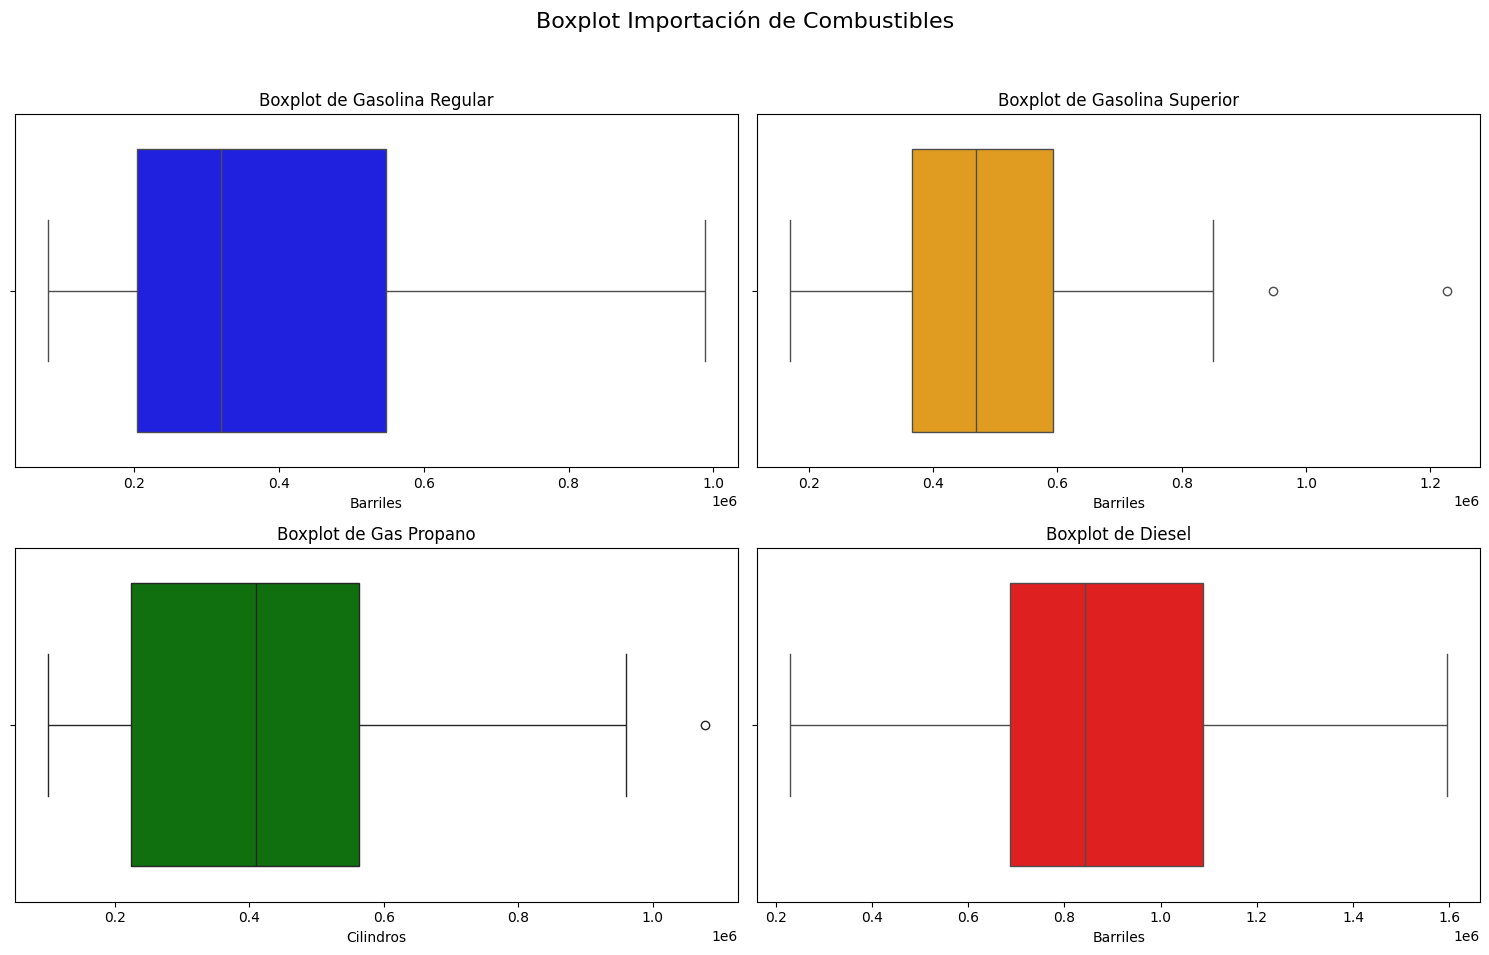

In [56]:
# Configuración de subplots para Importaciones de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Configuración para Gasolina Regular
sns.boxplot(x=importaciones['Gasolina Regular'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Boxplot de Gasolina Regular')
axs[0, 0].set_xlabel('Barriles')

# Configuración para Gasolina Superior
sns.boxplot(x=importaciones['Gasolina Superior'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Boxplot de Gasolina Superior')
axs[0, 1].set_xlabel('Barriles')

# Configuración para Gas Propano
sns.boxplot(x=importaciones['Gas Propano'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Boxplot de Gas Propano')
axs[1, 0].set_xlabel('Cilindros')

# Configuración para Diesel
sns.boxplot(x=importaciones['Diesel'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Boxplot de Diesel')
axs[1, 1].set_xlabel('Barriles')

# Ajustar el layout
fig.suptitle("Boxplot Importación de Combustibles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observaciones**
- Las distribuciones son más simétricas que en el consumo.
- Hay outliers significativos en gasolina superior y gas propano.
- La variabilidad es menor comparada con el consumo.

##### Precios Diarios

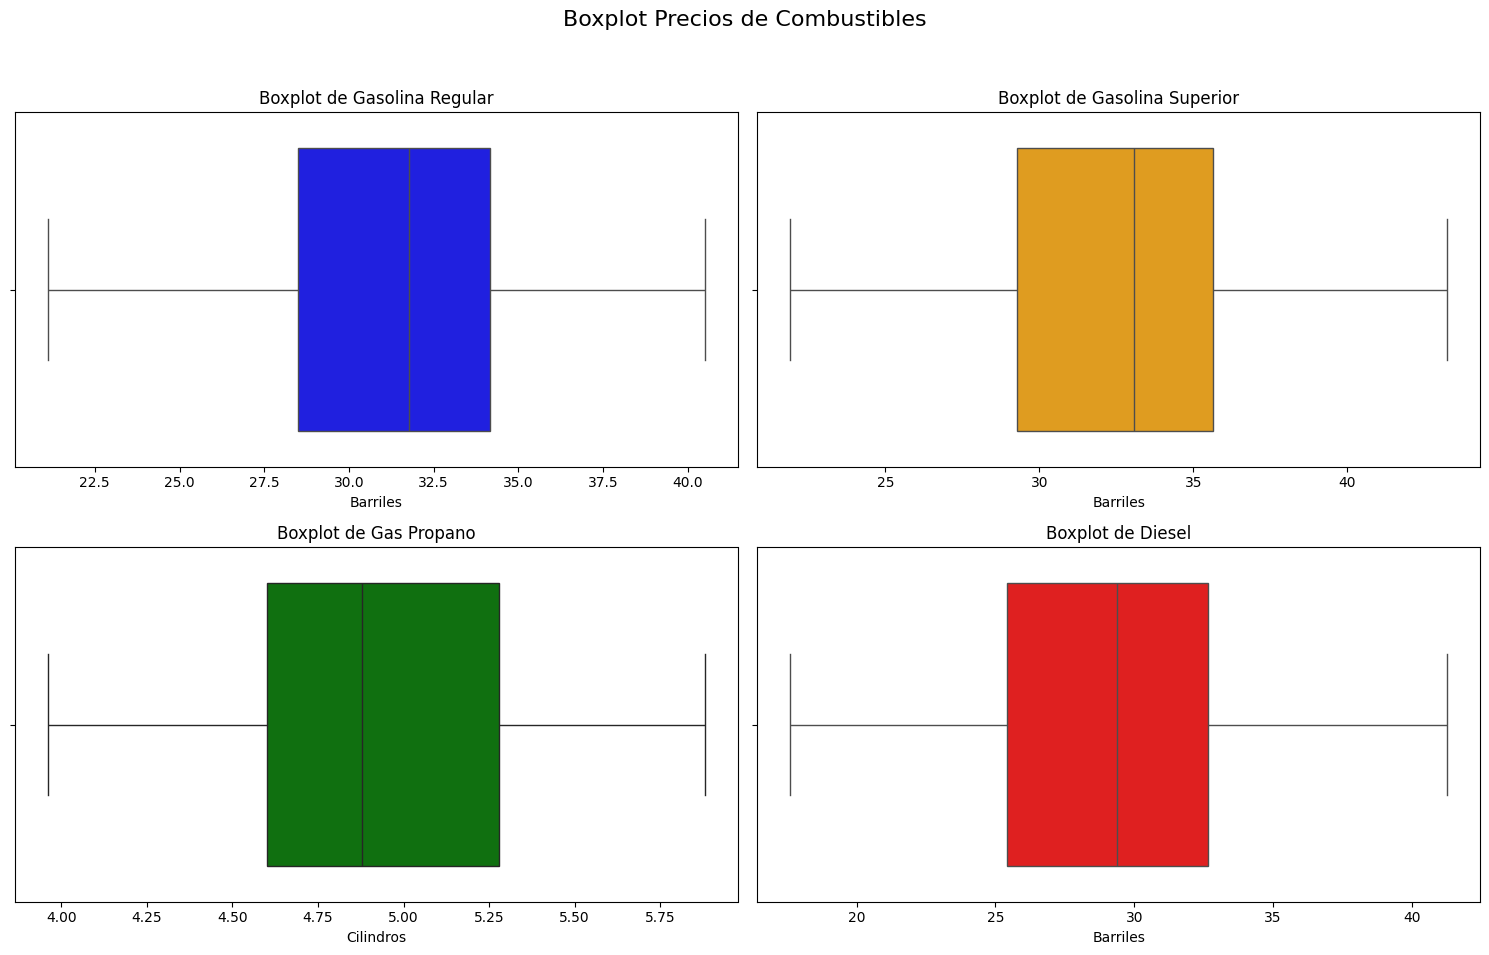

In [57]:
# Configuración de subplots para Precios de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Configuración para Gasolina Regular
sns.boxplot(x=precios['Gasolina Regular'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Boxplot de Gasolina Regular')
axs[0, 0].set_xlabel('Barriles')

# Configuración para Gasolina Superior
sns.boxplot(x=precios['Gasolina Superior'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Boxplot de Gasolina Superior')
axs[0, 1].set_xlabel('Barriles')

# Configuración para Gas Propano
sns.boxplot(x=precios['Gas Propano'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Boxplot de Gas Propano')
axs[1, 0].set_xlabel('Cilindros')

# Configuración para Diesel
sns.boxplot(x=precios['Diesel'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Boxplot de Diesel')
axs[1, 1].set_xlabel('Barriles')

# Ajustar el layout
fig.suptitle("Boxplot Precios de Combustibles", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observaciones**
- Las distribuciones son relativamente simétricas.
- Parece que no hay outliers comparados con consumo e importación.
- La variabilidad es menor, especialmente en gas propano.

##### Resumen

Los boxplots confirman las observaciones de los histogramas:
- Validan la asimetría en las distribuciones de consumo.
- Muestran la presencia de outliers reflejados en las colas largas de los histogramas.
- Revelan la variabilidad relativa entre los diferentes combustibles y métricas.

En las series de tiempo económicas, los outliers suelen representar eventos importantes, como crisis o cambios de política, por lo que eliminarlos podría ocultar patrones estacionales o cíclicos significativos. Estos valores atípicos en los datos de combustibles pueden reflejar fluctuaciones reales del mercado. Dado que los datos incluyen un evento real como la pandemia, la mejor estrategia es conservar los datos sin aplicar filtros para evaluar correctamente este tipo de comportamiento. De esta manera, se preserva la integridad de los datos.

#### Correlación de variables

In [58]:
def plot_corr_heatmaps(df1, df2, df3, title1, title2, title3):
    """
    Función que genera un gráfico con tres subplots, cada uno mostrando un mapa de calor 
    de la matriz de correlación de tres dataframes.

    Args:
        df1, df2, df3 (pandas.DataFrame): Los dataframes de entrada.
        title1, title2, title3 (str): Los títulos de cada subplot.
    
    Returns:
        None
    """
    # Calcular las matrices de correlación
    corr1 = df1.corr()
    corr2 = df2.corr()
    corr3 = df3.corr()

    # Crear el gráfico con tres subplots
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))

    # Plotear la matriz de correlación del primer dataframe
    sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, ax=axs[0])
    axs[0].set_title(title1)

    # Plotear la matriz de correlación del segundo dataframe
    sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, ax=axs[1])
    axs[1].set_title(title2)

    # Plotear la matriz de correlación del tercer dataframe
    sns.heatmap(corr3, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, ax=axs[2])
    axs[2].set_title(title3)

    # Ajustar el layout
    plt.tight_layout()
    plt.show()


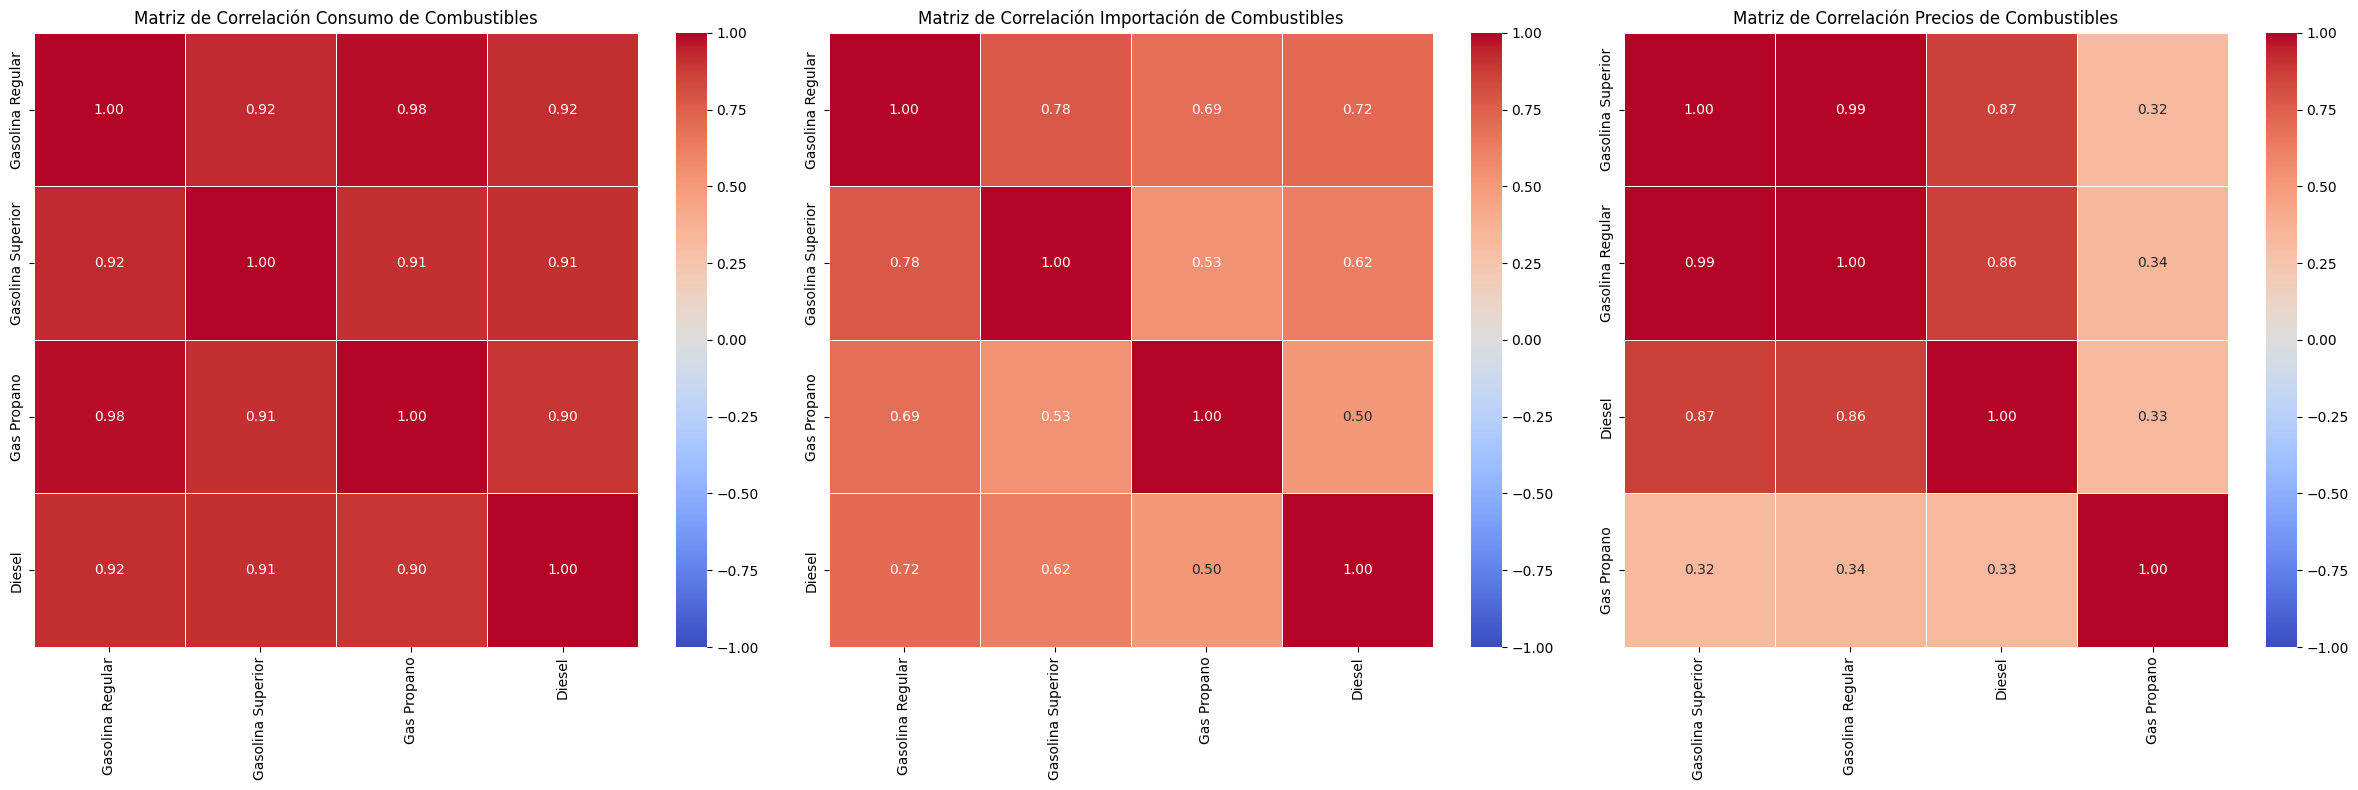

In [59]:
plot_corr_heatmaps(consumos, importaciones, precios, 
                  'Matriz de Correlación Consumo de Combustibles', 
                  'Matriz de Correlación Importación de Combustibles',
                  'Matriz de Correlación Precios de Combustibles')

##### Resumen


1. `Matriz de Correlación Consumo de Combustibles`:
- Todas las correlaciones son muy altas (0.90-0.98), lo que indica un fuerte patrón de consumo similar entre todos los tipos de combustibles.
- Esto sugiere que cuando aumenta el consumo de un tipo de combustible, tiende a aumentar el de los otros también.
- Es posible que se deba al crecimiento económico general, aumento de la población, o tendencias estacionales que afectan a todos los combustibles de manera similar.

2. `Matriz de Correlación Importación de Combustibles`:
- Las correlaciones son moderadas a altas (0.50-0.78), pero menos fuertes que en el consumo.
- La gasolina regular y superior muestran la correlación más alta (0.78), lo que tiene sentido dado que son productos similares.
- El gas propano muestra las correlaciones más bajas con los demás combustibles, sugiriendo que su importación puede estar influenciada por factores diferentes.
- Esto indica que aunque hay cierta relación en los patrones de importación, cada combustible tiene también sus propias dinámicas.

3. `Matriz de Correlación Precios de Combustibles`:
- Las correlaciones entre gasolina superior, regular y diésel son muy altas (0.86-0.99), indicando que sus precios tienden a moverse juntos.
- El gas propano muestra correlaciones mucho más bajas con los otros combustibles (0.32-0.34).
- Esto sugiere que los precios de las gasolinas y el diésel están fuertemente influenciados por factores comunes (como el precio del petróleo), mientras que el gas propano tiene una dinámica de precios más independiente.


Estas correlaciones son útiles para entender las dinámicas del mercado de combustibles, pero es importante recordar que correlación no implica causalidad. Factores externos como políticas gubernamentales, eventos económicos globales, o cambios tecnológicos pueden influir en estas relaciones.

#### Tendencias a lo largo del tiempo

In [60]:
def plot_fuel_evolution(df, title, xlabel, ylabel, start_date=None, end_date=None):
    """
    Función que genera un gráfico de línea con la evolución de los diferentes tipos de combustibles.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        title (str): El título del gráfico.
        start_date (str): La fecha de inicio en formato 'YYYY-MM-DD'.
        end_date (str): La fecha de fin en formato 'YYYY-MM-DD'.
    
    Returns:
        None
    """
    df = df.copy()
    # Filtrar el dataframe según las fechas de inicio y fin
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    elif start_date:
        df = df.loc[start_date:]
    elif end_date:
        df = df.loc[:end_date]

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(15, 8))

    # Plotear las series de tiempo
    for column in df.columns:
        ax.plot(df.index, df[column], label=column)

    # Añadir título y leyenda
    ax.set_title(title)
    ax.legend()

    # Añadir etiquetas de los ejes x e y
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

##### Tendencia General

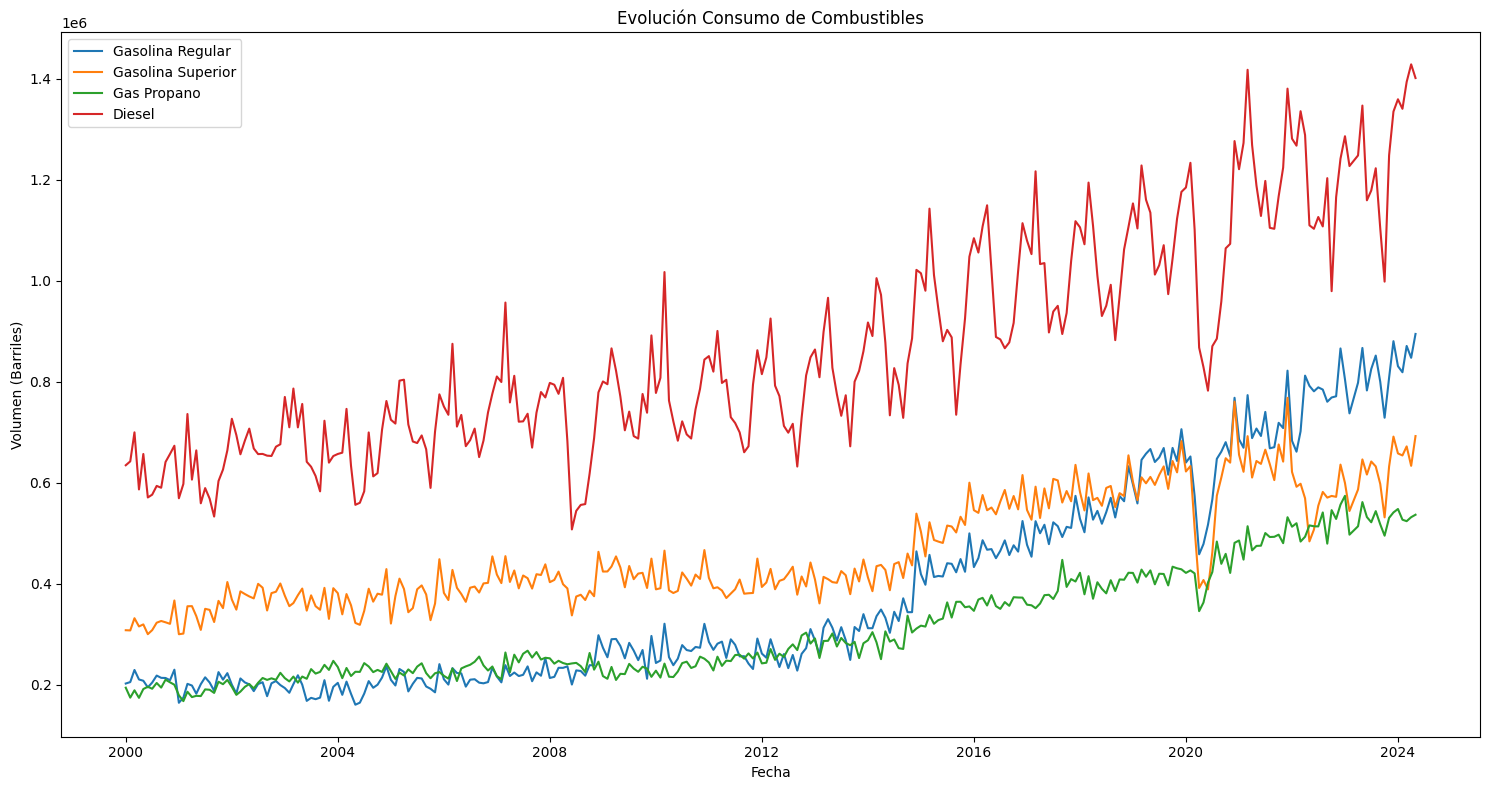

In [61]:
plot_fuel_evolution(consumos, 
                    'Evolución Consumo de Combustibles', 
                    'Fecha', 
                    'Volumen (Barriles)')

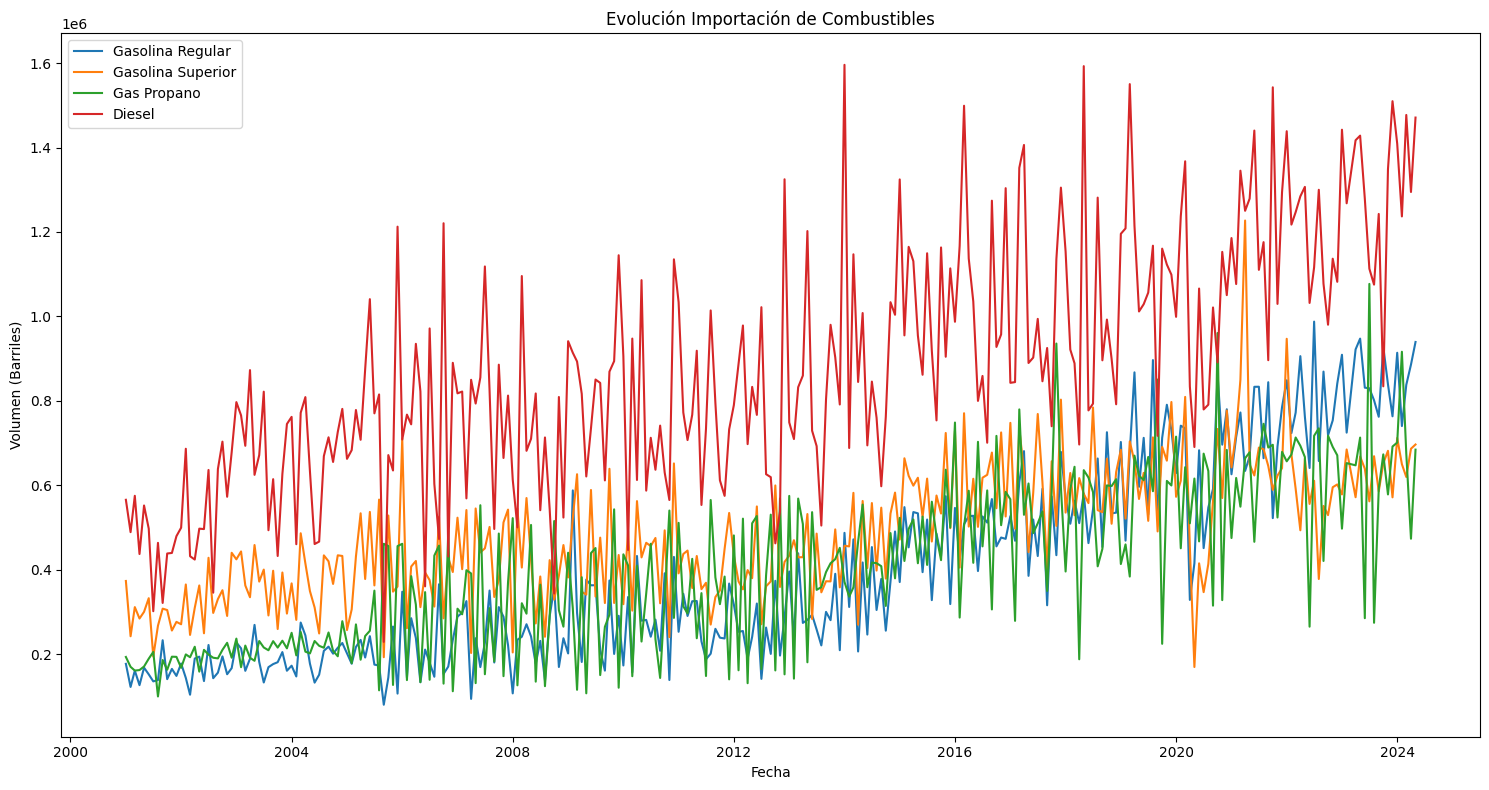

In [62]:
plot_fuel_evolution(importaciones,
                    'Evolución Importación de Combustibles',
                    'Fecha',
                    'Volumen (Barriles)')

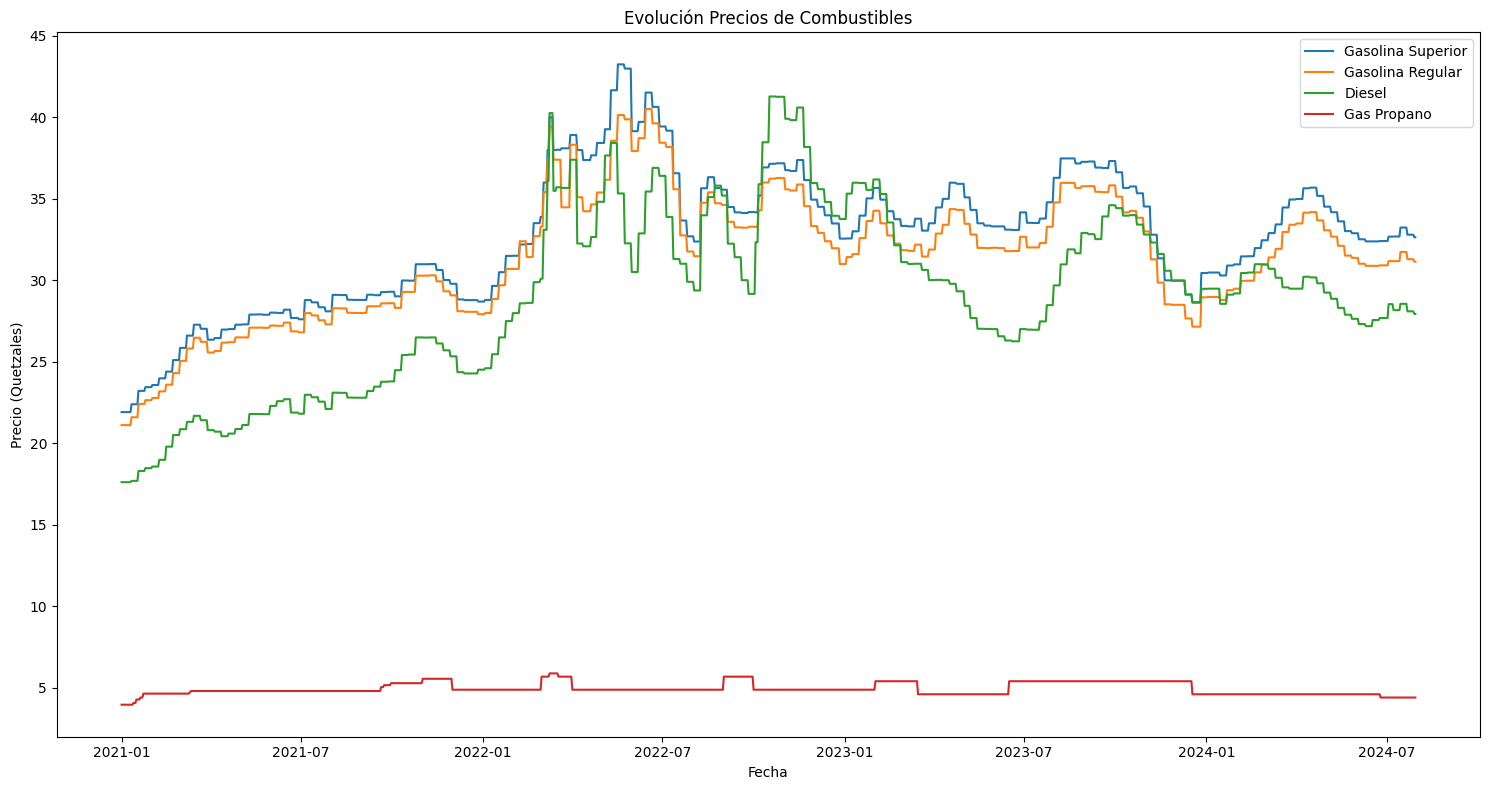

In [63]:
plot_fuel_evolution(precios,
                    'Evolución Precios de Combustibles',
                    'Fecha',
                    'Precio (Quetzales)')

##### Tendencia en Pandemia

Para Guatemala el primer caso de COVID-19 confirmado se dio el 13 de marzo de 2020. (PAHO, 2020)
El 5 de mayo del 2023 el director general de la Organización Mundial de la Salud (OMS) declaró “Ayer, el Comité de Emergencias se reunió por decimoquinta vez y me recomendó que declarara el fin de la emergencia de salud pública de importancia internacional. He aceptado ese consejo. Por lo tanto, declaro con gran esperanza el fin de COVID-19 como emergencia sanitaria internacional” (OMS, 2023)

Por lo tanto se toma como inicio de Pandemia la fecha de `13-03-2020` y como fin de pandemia se toma la fecha de `05-05-2023`.

**Referencias**
- OMS. (2023, mayo). Se acaba la emergencia por la pandemia, pero el COVID continua. Noticias ONU. https://news.un.org/es/story/2023/05/1520732
- PAHO. (2020, marzo). Se confirma primer caso de COVID-19 en Guatemala. OPS/OMS | Organización Panamericana de la Salud. https://www.paho.org/es/noticias/13-3-2020-se-confirma-primer-caso-covid-19-guatemala

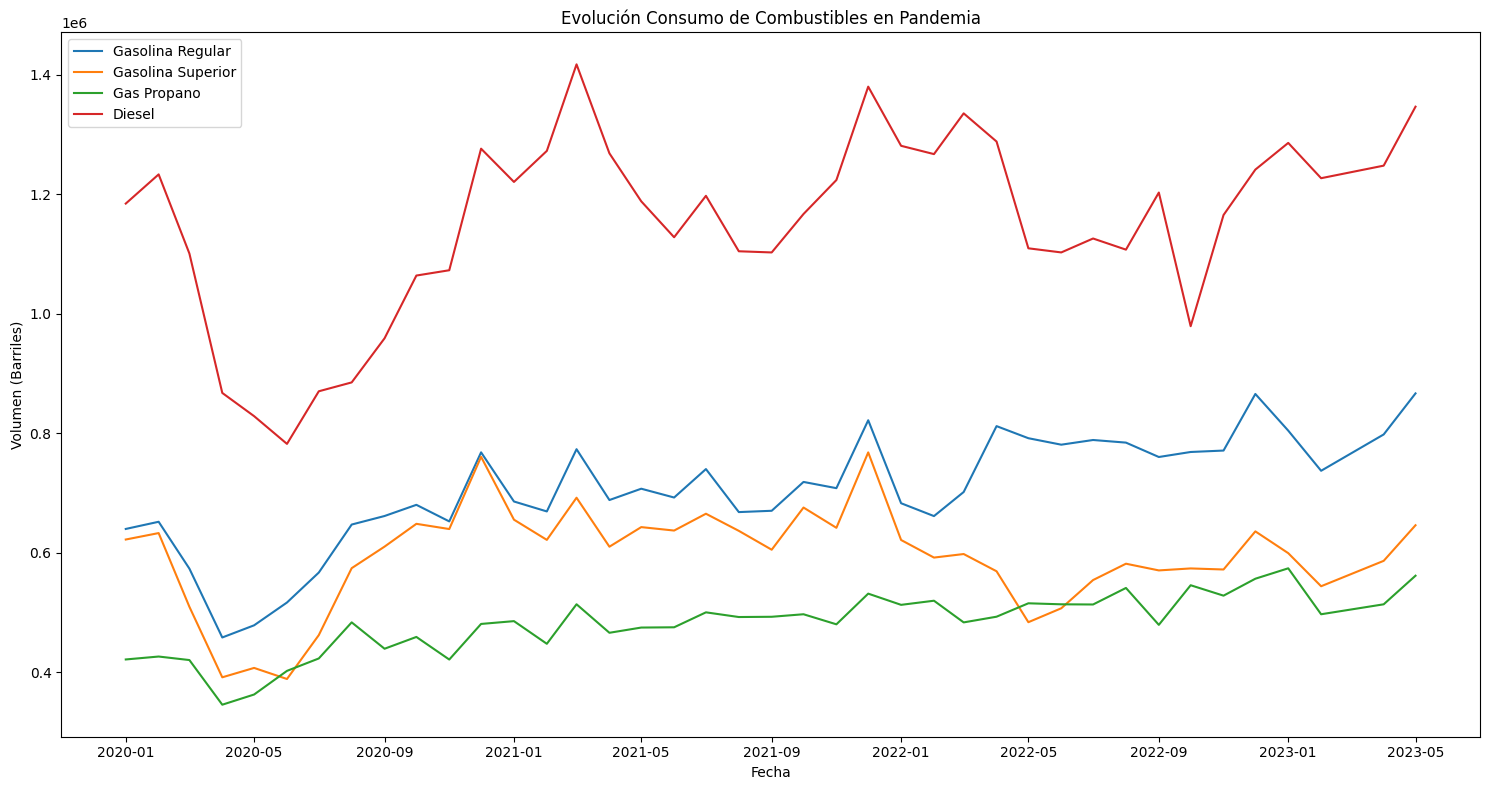

In [64]:
plot_fuel_evolution(consumos,
                    'Evolución Consumo de Combustibles en Pandemia',
                    'Fecha',
                    'Volumen (Barriles)',
                    start_date='2020-01-01',
                    end_date='2023-05-01')

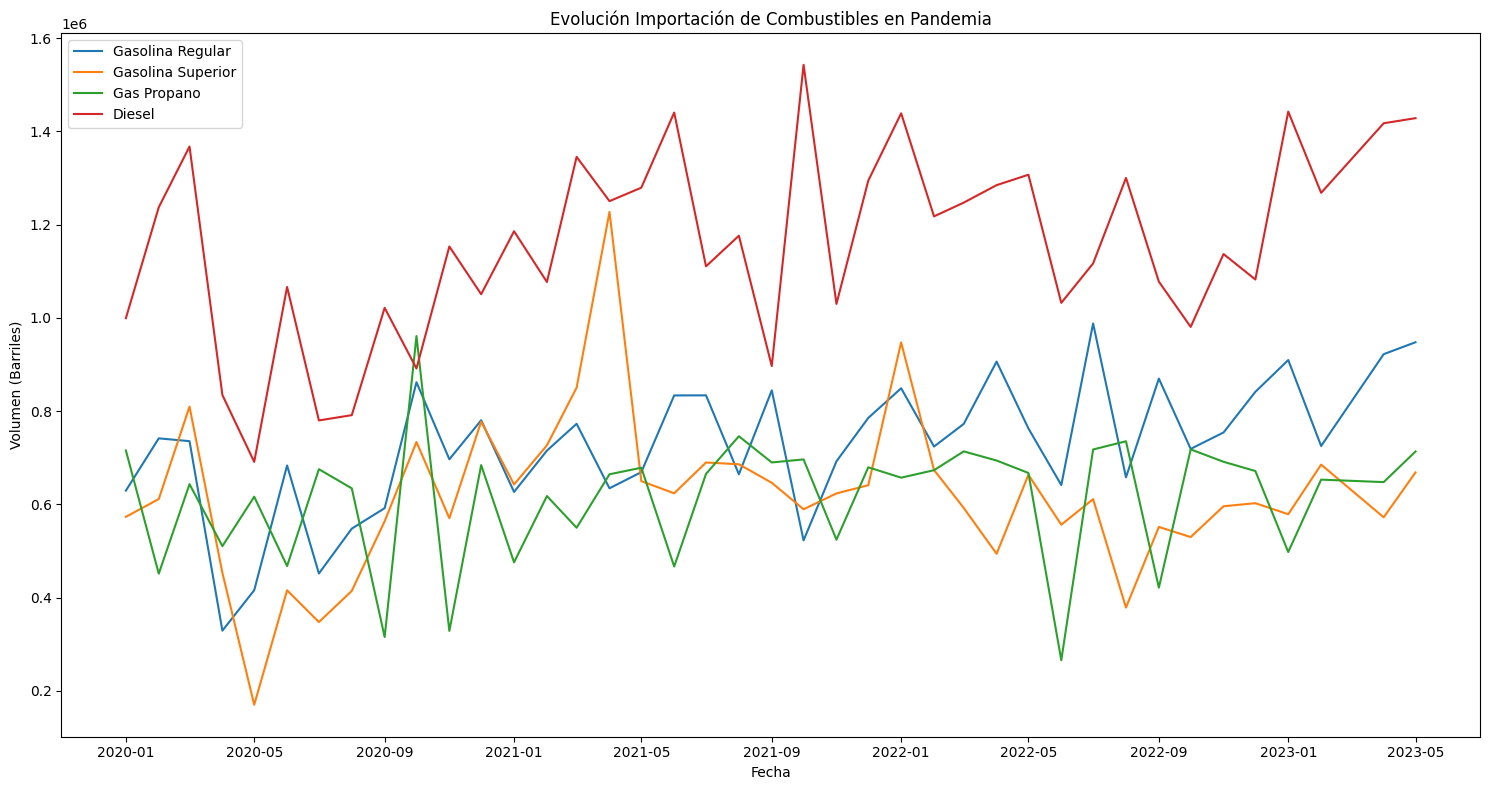

In [65]:
plot_fuel_evolution(importaciones,
                    'Evolución Importación de Combustibles en Pandemia',
                    'Fecha',
                    'Volumen (Barriles)',
                    start_date='2020-01-01',
                    end_date='2023-05-01')

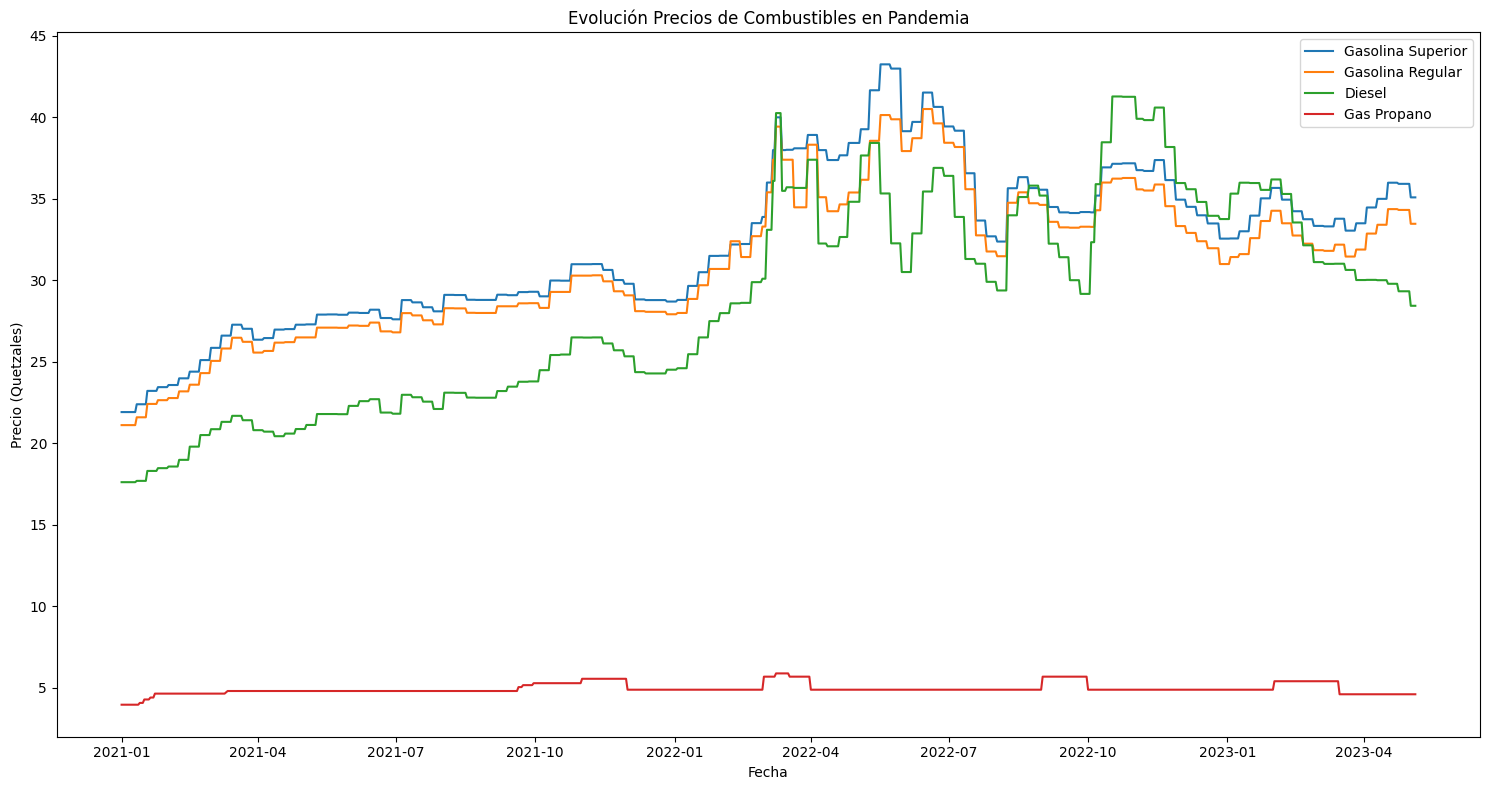

In [66]:
plot_fuel_evolution(precios,
                    'Evolución Precios de Combustibles en Pandemia',
                    'Fecha',
                    'Precio (Quetzales)',
                    start_date='2020-03-13',
                    end_date='2023-05-05')

##### Resumen

Las tendencias a lo largo del tiempo muestran que el consumo de combustibles ha ido aumentando de manera constante a lo largo de los años. Sin embargo, es evidente que cada año presenta picos en el consumo.

Por otro lado, las tendencias de las importaciones son más volátiles, con picos más pronunciados, lo que indica que hay momentos específicos en el año donde se realizan mayores importaciones en comparación con el resto de los meses.

Es evidente que el Diesel es el combustible más consumido y el que recibe mayores importaciones, ya que su tendencia tanto en consumo como en importación está por encima del resto de los combustibles.

En cuanto a los precios, la evolución muestra que son bastante elásticos, con picos que superan los 40 quetzales. Los tres tipos de combustible (gasolina superior, gasolina regular y diesel) presentan un comportamiento muy similar, solidificando la hipótesis de que tienen alta correlación debido a su naturaleza similar. En cambio, el gas propano muestra un comportamiento mucho más estable a lo largo del tiempo, con leves periodos de precios más altos.

Durante la pandemia, se observa una gran disminución en el consumo de combustible a pocos meses del primer caso registrado. Esto probablemente se deba a las cuarentenas, ya que la gente salía mucho menos y la población se mantuvo aislada, lo que redujo el uso de vehículos y, en consecuencia, el consumo de combustibles. A medida que se fue saliendo de la crisis inicial con las cuarentenas, hubo un repunte en el consumo de combustibles a mediados de 2021. Posteriormente, se observa otra disminución en el consumo debido a las disposiciones sanitarias aprobadas el 16 de abril de 2021 por el Consejo de Ministros, que limitaban las reuniones públicas y el consumo de alcohol, lo que nuevamente pudo significar una disminución en el uso de vehículos. El 30 de abril del mismo año, se establecieron nuevas disposiciones sanitarias que limitaban los aforos y horarios en parques públicos, centros turísticos, parques acuáticos, mercados, templos, centros comerciales, plazas, entre otros. En septiembre, el Ministro de Salud informó que se daría mayor flexibilidad a las medidas a nivel nacional, lo que incrementó nuevamente las salidas de las personas.

El comportamiento de las importaciones sigue este mismo patrón, pues cuando hubo crisis o medidas que limitaban la motivación de la gente para utilizar vehículos, las importaciones disminuyeron. En contraste, cuando hubo flexibilización o eliminación de medidas, las importaciones reflejaron altos volúmenes.

Desafortunadamente, no hay un historial de precios en 2020. Sin embargo, el inicio del periodo 2021 muestra un incremento en los precios después de una disminución, es decir, los precios en 2021 comenzaron con los niveles más bajos en todo el dataset. Esto indica que en 2020, los precios de todos los combustibles se vieron considerablemente afectados, no solo por la menor demanda, sino también porque las líneas logísticas y todo lo relacionado con el petróleo se vieron impactados durante la crisis de la pandemia.

**Referencias**
- Proyecto Mesoamerica. (2020) GUATEMALA COVID-19 DISPOSICIONES NACIONALES. proyectomesoamerica. http://proyectomesoamerica.org/index.php/guatemala-covid-19

#### Datos de Interés

##### Años con alta y baja volatilidad de precios

In [76]:
# Calcular la desviación estándar anual de los precios
volatilidad_anual = precios.resample('YE').std()

# Encontrar el año con la mayor y menor volatilidad
año_max_volatilidad = volatilidad_anual.idxmax()
max_volatilidad = volatilidad_anual.max()
año_min_volatilidad = volatilidad_anual.idxmin()
min_volatilidad = volatilidad_anual.min()

# Crear un dataframe con los resultados
volatilidad_anual_df = pd.DataFrame({
    'Año con mayor volatilidad': año_max_volatilidad,
    'Volatilidad Máxima': max_volatilidad,
    'Año con menor volatilidad': año_min_volatilidad,
    'Volatilidad Mínima': min_volatilidad
})

# Mostrar los resultados
display(volatilidad_anual_df)

,Año con mayor volatilidad,Volatilidad Máxima,Año con menor volatilidad,Volatilidad Mínima
Gasolina Superior,2022-12-31,3.319348,2024-12-31,1.514702
Gasolina Regular,2022-12-31,2.982055,2024-12-31,1.513854
Diesel,2022-12-31,4.145524,2024-12-31,1.113758
Gas Propano,2023-12-31,0.364340,2024-12-31,0.075271


##### Años con los mayores y menores precios

In [77]:
# Agrupar por año y calcular el precio promedio anual
precios_anuales = precios.resample('YE').mean()

# Encontrar el año con el mayor y menor precio promedio
año_max_precio = precios_anuales.idxmax()
max_precio = precios_anuales.max()
año_min_precio = precios_anuales.idxmin()
min_precio = precios_anuales.min()

# Crear un dataframe con los resultados
precios_anuales_df = pd.DataFrame({
    'Año con mayor precio promedio': año_max_precio,
    'Precio Promedio Máximo': max_precio,
    'Año con menor precio promedio': año_min_precio,
    'Precio Promedio Mínimo': min_precio
})

# Mostrar los resultados
display(precios_anuales_df)

,Año con mayor precio promedio,Precio Promedio Máximo,Año con menor precio promedio,Precio Promedio Mínimo
Gasolina Superior,2022-12-31,36.035315,2021-12-31,27.674274
Gasolina Regular,2022-12-31,34.681397,2021-12-31,26.904740
Diesel,2022-12-31,33.645425,2021-12-31,22.352384
Gas Propano,2023-12-31,5.123507,2024-12-31,4.566038


##### Meses con mmayores y menores volumenes de importación

In [78]:
# Agrupar por mes y sumar el volumen de importaciones
importaciones_mensuales = importaciones.resample('ME').sum()

# Encontrar el mes con mayor volumen de importaciones
mes_max_importaciones = importaciones_mensuales.idxmax()
max_importaciones = importaciones_mensuales.max()

# Encontrar el mes con menor volumen de importaciones
mes_min_importaciones = importaciones_mensuales.idxmin()
min_importaciones = importaciones_mensuales.min()

# Crear un dataframe con los resultados
importaciones_mensuales_df = pd.DataFrame({
    'Mes con mayor importación': mes_max_importaciones,
    'Importación Máxima': max_importaciones,
    'Mes con menor importación': mes_min_importaciones,
    'Importación Mínima': min_importaciones
})

# Mostrar los resultados
display(importaciones_mensuales_df)


,Mes con mayor importación,Importación Máxima,Mes con menor importación,Importación Mínima
Gasolina Regular,2022-07-31,987872.05,2023-03-31,0.0
Gasolina Superior,2021-04-30,1227173.53,2023-03-31,0.0
Gas Propano,2023-07-31,1077122.75,2023-03-31,0.0
Diesel,2014-01-31,1595698.56,2023-03-31,0.0


##### Meses con mayor y menor volumen de consumo

In [79]:
# Agrupar por mes y sumar el volumen de consumo
consumos_mensuales = consumos.resample('ME').sum()

# Encontrar el mes con mayor volumen de consumo
mes_max_consumo = consumos_mensuales.idxmax()
max_consumo = consumos_mensuales.max()

# Encontrar el mes con menor volumen de consumo
mes_min_consumo = consumos_mensuales.idxmin()
min_consumo = consumos_mensuales.min()

# Crear un dataframe con los resultados
consumos_mensuales_df = pd.DataFrame({
    'Mes con mayor consumo': mes_max_consumo,
    'Consumo Máximo': max_consumo,
    'Mes con menor consumo': mes_min_consumo,
    'Consumo Mínimo': min_consumo
})

# Mostrar los resultados
display(consumos_mensuales_df)

,Mes con mayor consumo,Consumo Máximo,Mes con menor consumo,Consumo Mínimo
Gasolina Regular,2024-05-31,894533.14,2023-03-31,0.0
Gasolina Superior,2021-12-31,768102.83,2023-03-31,0.0
Gas Propano,2023-01-31,574148.00,2023-03-31,0.0
Diesel,2024-04-30,1428143.44,2023-03-31,0.0


##### Resumen

1. **Volatilidad de Precios**
- Gasolina Superior tuvo el mayor nivel de volatilidad en 2022, con un valor de 3.319348. El año con la menor volatilidad para este tipo de gasolina fue 2024, con un valor de 1.514702.
- Gasolina Regular mostró la mayor volatilidad en 2022 (2.982055) y la menor en 2024 (1.513854).
- Diesel tuvo la mayor volatilidad en 2022 (4.145524) y la menor en 2024 (1.113758).
- Gas Propano presentó la mayor volatilidad en 2023 (0.364340) y la menor en 2024 (0.075271).
En general, los precios de los combustibles tienden a ser más volátiles en los años más recientes (2022 o 2023) y menos volátiles en 2024. Diesel muestra la mayor volatilidad en comparación con los otros combustibles, lo que podría indicar fluctuaciones de precios más amplias y posiblemente más impredecibles.

2. **Precios Promedio**
- Gasolina Superior tuvo el precio promedio más alto en 2022 (36.035315) y el más bajo en 2021 (27.674274).
- Gasolina Regular también tuvo el precio promedio más alto en 2022 (34.681397) y el más bajo en 2021 (26.904740).
- Diesel mostró el precio promedio más alto en 2022 (33.645425) y el más bajo en 2021 (22.352384).
- Gas Propano tuvo el precio promedio más alto en 2023 (5.123507) y el más bajo en 2024 (4.566038).
Los precios promedio de la gasolina superior y la gasolina regular alcanzaron su punto máximo en 2022, mientras que los precios del diesel también aumentaron significativamente en ese año.
Gas Propano muestra una ligera tendencia de aumento en el precio promedio en los últimos años, aunque la diferencia no es tan pronunciada como en los otros combustibles.

3. **Importaciones**
- Gasolina Regular tuvo el mayor volumen de importación en julio de 2022 (987872.05), con el menor en marzo de 2023 (0.0).
- Gasolina Superior tuvo la mayor importación en abril de 2021 (1227173.53) y la menor en marzo de 2023 (0.0).
- Gas Propano mostró la mayor importación en julio de 2023 (1077122.75) y la menor en marzo de 2023 (0.0).
- Diesel tuvo el mayor volumen de importación en enero de 2014 (1595698.56) y el menor en marzo de 2023 (0.0).
Los meses con mayor importación suelen ser bastante dispersos en el tiempo, lo que puede indicar fluctuaciones estacionales o cambios en la demanda. Las importaciones de combustibles tienden a ser muy bajas o nulas en ciertos meses, lo que puede reflejar temporadas de baja demanda o problemas en la cadena de suministro o que no se tiene registro de esa fecha en especifico.

4. **Consumo**
- Gasolina Regular mostró el mayor consumo en mayo de 2024 (894533.14) y el menor en marzo de 2023 (0.0).
- Gasolina Superior tuvo el mayor consumo en diciembre de 2021 (768102.83) y el menor en marzo de 2023 (0.0).
- Gas Propano tuvo el mayor consumo en enero de 2023 (574148.00) y el menor en marzo de 2023 (0.0).
- Diesel mostró el mayor consumo en abril de 2024 (1428143.44) y el menor en marzo de 2023 (0.0).
El consumo de combustibles también muestra patrones estacionales o eventuales, con meses de alto consumo seguidos de meses de bajo consumo. Las fechas con el menor consumo son consistentemente en marzo de 2023, lo que podría ser un mes de baja demanda general o un efecto estacional o lo que es mas probable, que no se tenga registro de datos en esa fecha en especifico.
